<a href="https://colab.research.google.com/github/Noxscamp/CoderHouse/blob/main/ProyectoFinal%2BLeandro_Marin%2BLeonel_Colloca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # ***Video Game Sales*** 🎮

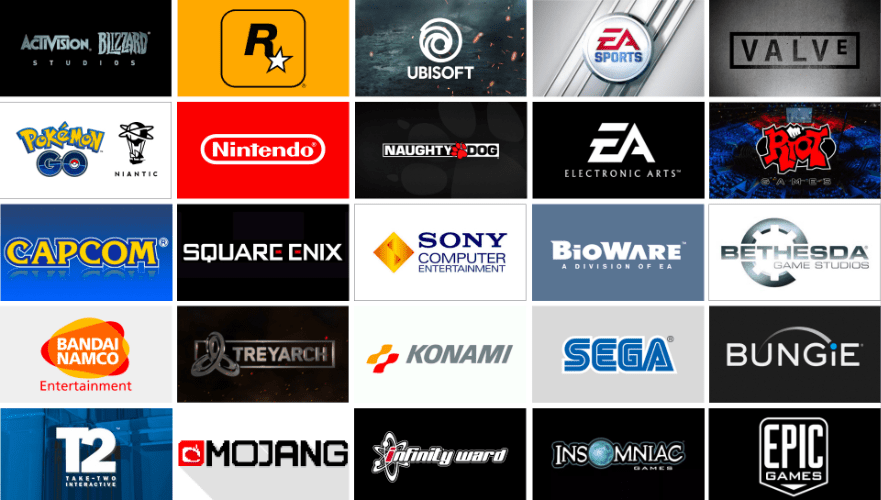




# ***Business Understading.***

## Definición del objetivo
Con los datos históricos que se posee acerca de los videojuegos, géneros, plataformas y ventas, buscamos obtener indicios que demuestren qué tipos de plataformas serán las más utilizadas a futuro y qué genero tendrá mayor relevancia permitiendo desarrollar nueva información sobre futuras ventas.
## Contexto comercial
Debido al constante cambio tecnologico que vivimos, se ha producido un enorme desarrollo en los videojuegos, los cuales están próximos a simular nuestra realidad, lo cual nos benificiaría a la hora de tomar desiciones, realizar ensayos o pruebas en dispositivos, entrenar a un piloto o una IA, diseñar y modificar estructuras previo a fabricarlas, etc permitiendo ahorrar costos y tiempo. Es por eso que las empresas más importantes del mundo están en la búsqueda de tecnologías como plataformas de videojuegos y simuladores que les permitan encontrar nuevas soluciones a sus servicios de forma más inmersiva.
## Problema comercial
Se pretende contar con un modelo predictivo que ayude a tomar las desiciones correctas sobre el futuro de las plataformas y géneros más relevantes de videojuegos.
## Contexto analítico
*Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias.*

**Los campos incluyen:**

*   Rank: Ranking de ventas totales.

*   Name: Nombre del juego.
*   Plataform: PLataforma del juego.

*   Year: Año en la cual el juego se lanzó.

*   Genre: Genero del juego.

*   Publisher: Editor del juego.
*   NA_Sales: Ventas en Estados Unidos (Millones)


*   EU_Sales: Ventas en Europa (Millones)


*   JP_Sales: Ventas en Japon (Millones)

*   Other_Sales: Otras ventas (Millones)
*   Global_Sales: Total de ventas.


# ***Data Understading.***

## ***Data Adquisition***

Llamo a las librerias potenciales a utilizar.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

In [ ]:
url='https://raw.githubusercontent.com/Noxscamp/CoderHouse/main/Datasets/vgsales.csv'
resp_vgsales=requests.get(url)
print(resp_vgsales)

<Response [200]>


In [ ]:
vgsales = pd.read_csv(url)

In [ ]:
df = pd.DataFrame(vgsales)
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [ ]:
df.shape

(16598, 11)

### ***Serie de preguntas***

*   ¿Cuál fue la relación entre las ventas en Estados Unidos y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Europa y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Japón y el resto del mundo? 
*   ¿Cuáles son los juegos mas vendidos?
*   ¿Cuáles son los generos mas vendidos? 
*   ¿Cuál fue el formato de consola más utilizado?
*   ¿Cuál fue el desarrollador que obtuvo más ventas? 
*   ¿Cuál fue la evolución entre las plataformas a lo largo de los años? 

# ***Data Preparation.***

## ***EDA - Exploratory Data Analysis 📊***

### ***1) Data Wrangling***

Comenzamos realizando la **preparación de los datos**, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

####Borrado de duplicados

In [ ]:
df = df.drop_duplicates()
print(df.shape)

(16598, 11)


####Análisis de nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Text(0.5, 1.0, 'Matris de valores perdidos')

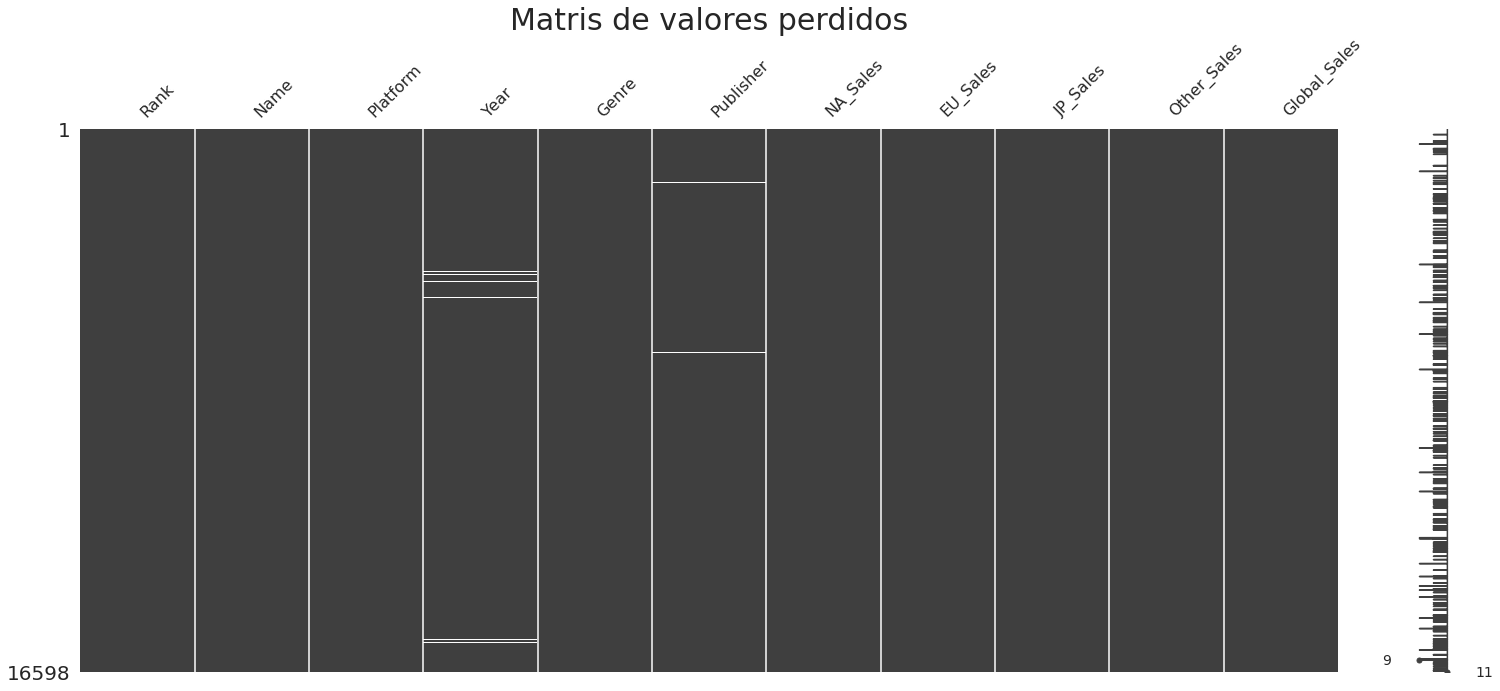

In [ ]:
msno.matrix(df)
plt.title("Matris de valores perdidos",fontsize=30)

Podemos observar rápidamente que existen unos pocos datos nulos en las columnas "Year" y "Publisher".

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentaje_Missing': percent_missing})
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False)

Columnas  Porcentaje_Missing
Year                  Year            1.632727
Publisher        Publisher            0.349440
Rank                  Rank            0.000000
Name                  Name            0.000000
Platform          Platform            0.000000
Genre                Genre            0.000000
NA_Sales          NA_Sales            0.000000
EU_Sales          EU_Sales            0.000000
JP_Sales          JP_Sales            0.000000
Other_Sales    Other_Sales            0.000000
Global_Sales  Global_Sales            0.000000

<Figure size 1080x360 with 0 Axes>

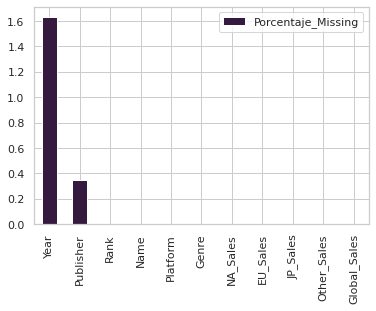

In [ ]:
plt.figure(figsize=(15,5))
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False).plot(kind='bar')
plt.show()

Podemos deducir que la mayor parte de los datos nulos se encuentran en la variable "Year" con el 1,6% de los mismos, miertras que en la variable "Publisher" apenas alcanza 0,35% de datos nulos. Por lo tanto, concluimos que los datos nulos no tienen relevancia alguna para nuestro análisis.

Con la información obtenida y los datos duplicados eliminados podemos comenzar a tomar decisiones sobre qué hacer con los datos nulos:

In [ ]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

Decisión: Al tener muchos datos relevantes, solo eliminaremos aquellos datos que estén vacios.

In [ ]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

Decisión: Aplicar alguna técnica de reemplazo por 'Desconocido'

####Llenar con la catergoría "Desconocido"

In [ ]:
col_cat=['Publisher'] #Columnas categóricas

#reemplazar con "Desconocido" en las columnas que estén vacias
for i in col_cat:
  df[i] = df[i].fillna('Desconocido')

df['Publisher'].value_counts().sum()

16598

In [ ]:
df.shape

(16598, 11)

Podemos observar que la cantidad de datos de cada variable coinicide con la cantidad de filas del dataset, por lo tanto, no existen mas datos vacíos sino que se encuentran reemplazados por "Desconocido".

####Borrado de filas con datos nulos

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df['Year'].isnull().sum()

0

Podemos observar que ya no hay datos nulos en ambas variables numericas.

####Transformo el tipo de dato de las columnas

Debido a que trabajaremos con años, podemos utilizar variables enteras y no floats.

In [ ]:
df["Year"] = df["Year"].astype(int)

<ipython-input-18-209e5ab67af7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Year"].astype(int)


####Verifico las transformaciones realizadas en el dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### ***2) Distribución de datos***

Continuamos con la preparación del dataset observando la distibución de datos así como la existencia de outliers que debamos eliminar para no tener un impacto negativo en nuestro análisis.

In [ ]:
df['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

Text(0.5, 1.0, 'Boxplot')

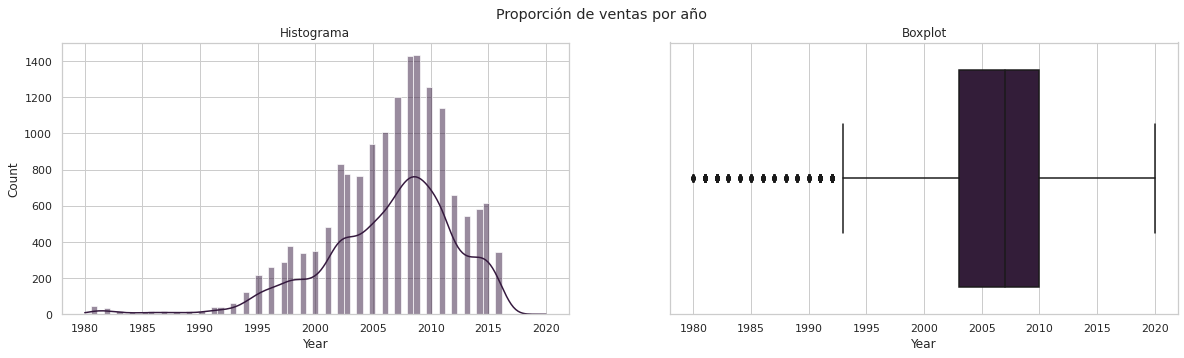

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Proporción de ventas por año')

# Histograma
sns.histplot(ax=axes[0], x = df['Year'], kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x = df['Year'])
axes[1].set_title("Boxplot")


Se logra visualizar que existe un aumento en la cantidad de ventas de juegos con el paso de los años, sin embargo, también se logra identificar una caída en las ventas después del 2010, tal vez debido al aumento de precios o a la salida de nuevos servicios de gaming en la nube.

Podemos observar también que tenemos presencia de outliers en los datos pasados, por lo que es necesario realizar un análisis para determinar si dichos datos tendrán un impacto negativo en la obtensión de insights y deberían eliminarse.

### ***3) Correlaciones y dependencias***

**A) Variables Numericas**

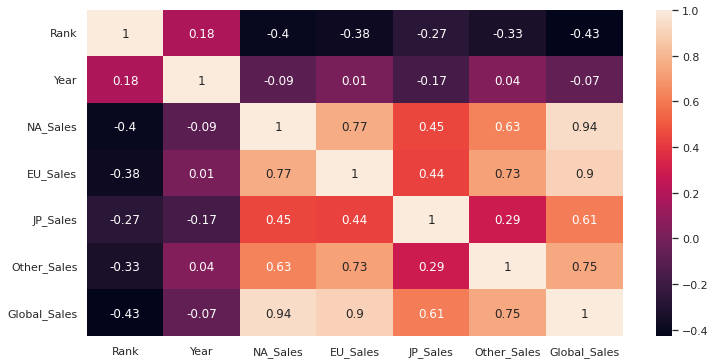

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

Las ventas en Estados Unidos, Europa y Japón influyen de manera significante en el resto del mundo, con una correlación de 0.94, 0.90 y 0.61 respectivamente.

Sin embargo, no existe una gran correlación entre las ventas propias de Estados Unidos y Europa con respecto a Japón, seguramente porque los usuarios consumen distintos géneros o plataformas en esas regiones, obteniendo una correlación de 0.45 y 0.44. 

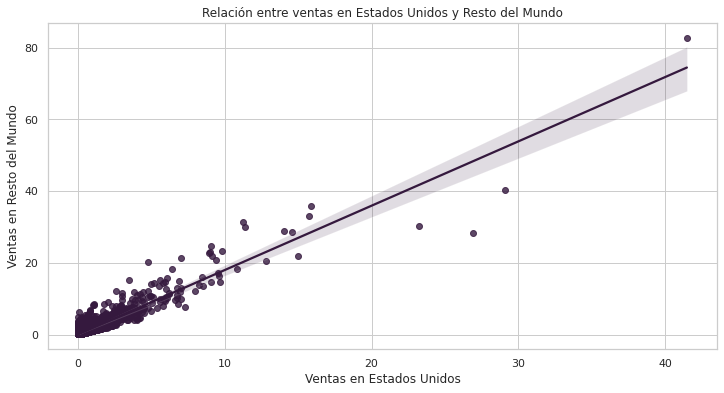

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Estados Unidos')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Estados Unidos y Resto del Mundo')
plt.show()

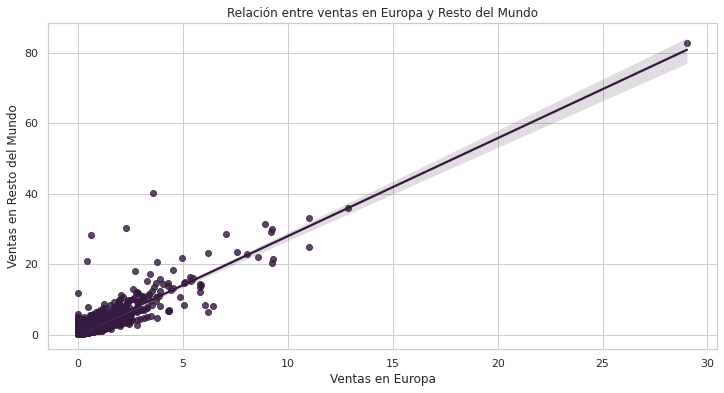

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Europa y Resto del Mundo')
plt.show()

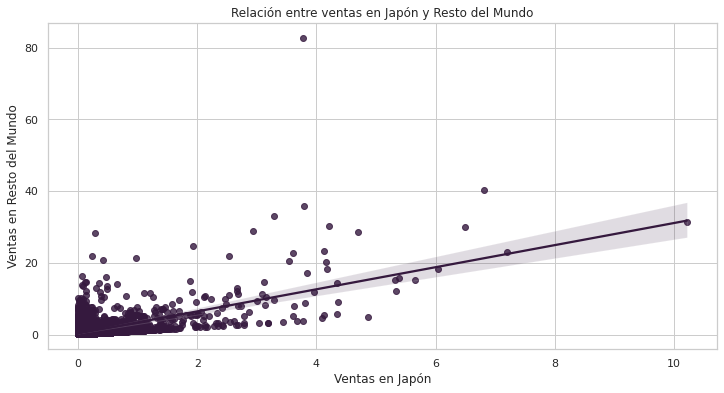

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['JP_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Japón')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Japón y Resto del Mundo')
plt.show()

Como podemos observar, existe una relación lineal con respecto a la cantidad de ventas en Estados Unidos, Europa y Japón, y el Resto del Mundo. Es decir, a mayor cantidad de ventas en una de las 3 regiones de mayor consumo, también crecen las ventas en el Resto del Mundo. Eso quiere decir, que cuando un género, plataforma o desarrollador tiene éxito, tiene un alcance a todo el mundo y no sólo a una región.

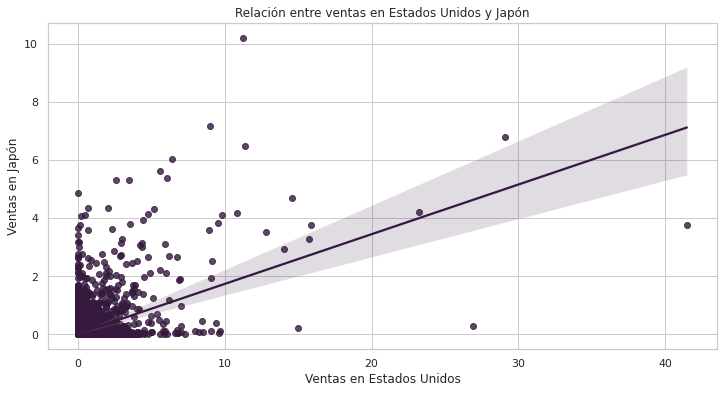

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Estados Unidos')
plt.ylabel('Ventas en Japón')
plt.title('Relación entre ventas en Estados Unidos y Japón')
plt.show()

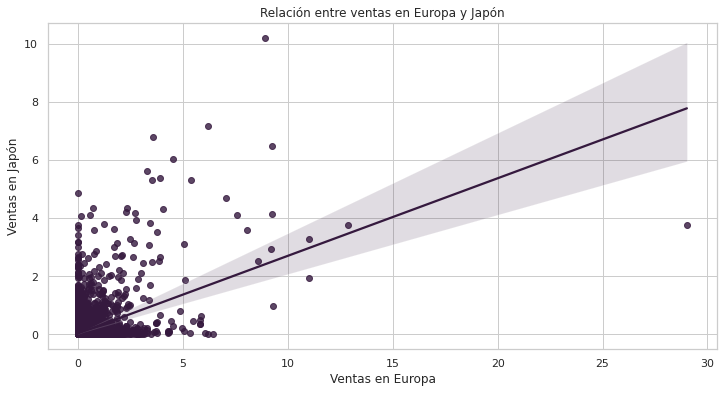

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Japón')
plt.title('Relación entre ventas en Europa y Japón')
plt.show()

Pero si observamos la relación entre las ventas en Estados Unidos y Japón, y las ventas entre Europa y Japón podemos notar una menor correlación, seguramente por las diferentes culturas y consumo, donde Estados Unidos y Europa con respecto a Japón tienen inclinación a distintos géneros y plataformas.

Más adelante podremos graficar y observar qué géneros y plataformas son las que más se consumen en cada región.

**B) Variables categoricas**

In [ ]:
T_contingencia = pd.crosstab(df.Platform, df.Genre)
T_contingencia

Genre     Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Platform                                                                
2600          55          1         1     5         9       8       4   
3DO            0          1         0     0         0       1       0   
3DS          180         36        14    53        28      20      10   
DC             3         11        12     0         2       0       6   
DS           336        238        36   389        90     236      66   
GB             6          5         0     8        18      15       2   
GBA          162         37        23   110       139      39      64   
GC            98         20        42    35        73      12      60   
GEN            3          2         5     1         7       0       1   
GG             0          0         0     0         1       0       0   
N64           37          4        29    18        30      12      57   
NES           13          1         4     2        28      14       4   
NG             0          0        11     0         0       0       0   
PC           161         65         5    22        11      25      57   
PCFX           0          0         0     0         0       0       0   
PS           154         67       108    76        64      32     144   
PS2          345        196       146   218       101      18     212   
PS3          373         72        76   121        36       2      90   
PS4          122         19        17    15        11       1      17   
PSP          217        213        73   104        36      44      65   
PSV          142         86        16    24        10       3      11   
SAT            3         26        31    15         5       5       8   
SCD            0          0         0     2         1       0       1   
SNES          12          4        25    17        26      13       9   
TG16           0          1         0     0         0       0       0   
WS             0          0         0     0         0       0       0   
Wii          230         83        41   272        57      54      92   
WiiU          63          3         5    21        16       4       3   
X360         318         47        65   122        24       6     102   
XB           152         26        44    45        49       7     122   
XOne          68         12         7    15         4       0      19   

Genre     Role-Playing  Shooter  Simulation  Sports  Strategy  
Platform                                                       
2600                 0       22           1      10         0  
3DO                  0        0           1       0         0  
3DS                 85        6          28      25        15  
DC                   4        3           1      10         0  
DS                 196       42         280     146        78  
GB                  21        1           5       9         7  
GBA                 73       40          18      88        18  
GC                  25       48          12     106        11  
GEN                  3        1           0       3         1  
GG                   0        0           0       0         0  
N64                  7       24          10      79         9  
NES                 11        7           0      14         0  
NG                   0        0           0       1         0  
PC                 103      145         115      49       185  
PCFX                 1        0           0       0         0  
PS                  97       96          60     221        70  
PS2                183      158          89     391        70  
PS3                117      155          30     210        22  
PS4                 47       34           5      43         5  
PSP                191       37          29     130        58  
PSV                 82        5           3      23         7  
SAT                 17       22           7      16        18  
SCD                  1        0           0       0   

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
import pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


<ipython-input-29-a4476a1a1da9>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Los gráficos de correlación anteriores nos pueden dar una idea de que existe una gran similitud en cuanto a ventas en el mercado Americano y el Europeo, sin embargo, el mercado Japones presenta poca relación con respecto a los anteriores, tal como se mencionó, posiblente por la diferencia cultural lo que conlleva a un consumo de plataformas y géneros distintos que Estados Unidos y Europa.

También notamos en el gráfico del Coeficiente de Phi una buena correlación entre las ventas de plataformas y el paso de los años, seguramente por el avance de las mismas y el consumo masivo que fueron teniendo. Con respecto al género de los juegos no se visualiza una gran correlación con otras características del dataset.

### ***4) Análisis Estadístico***

Realizaremos una serie de preguntas e hipotesis sobre el dataset que intentaremos responder a traves de visualizaciones e interpretaciones de las mismas.

####Análisis descriptivo e inferencial univariado

#####Feature: "Platform"

Proporción de plataformas vendidas:

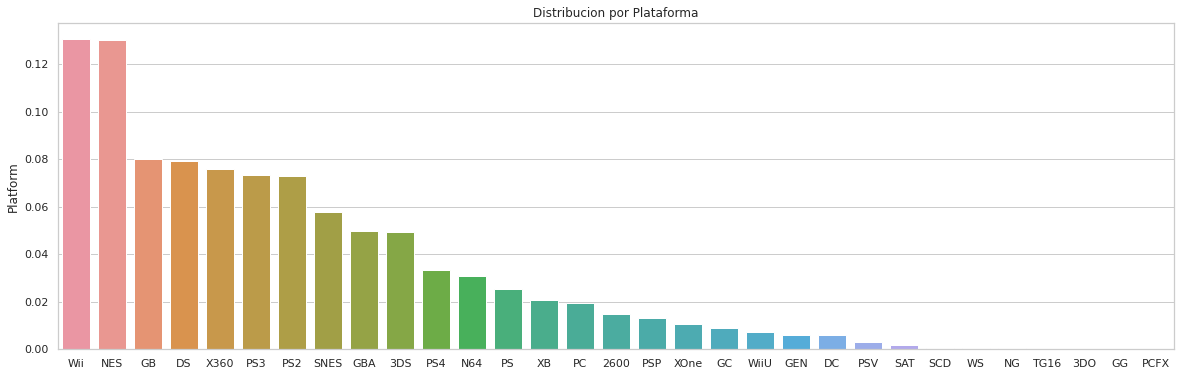

In [ ]:
plt.figure(figsize=(20, 6))
x=df["Platform"].unique()
y=df["Platform"].value_counts()/df["Platform"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Plataforma')
plt.show()

Se puede observar que las plataformas con un porcentaje considerable de ventas a lo largo de la historia fueron aquellas desarrolladas por Nintendo, como la  Nintendo Wii, la Nintendo NES, la GameBoy, la Nintendo DS, seguidas por la XBox 360 desarrollada por Microsoft y las conocidas Playstation 3 y 2 desarrolladas por Sony. 

Podemos notar que la Playstation 4  y la XBox One no presentan un gran porcentaje de ventas comparado con sus antecesores, sin embargo, en llamativo como la Nintendo NES se ha mantenido como un éxito de ventas desde su salida en 1985.

Nintendo NES:

![nintendo](https://media.istockphoto.com/id/458077055/es/foto/nintendo-sistema-de-entretenimiento-con-controlador-y-juego.jpg?s=612x612&w=0&k=20&c=AbKDu6BeiMiWYJPh6sP66aI1ywDQb_k0K9iDh45nNpk=)


#####Feature: "Genre"

Proporción de géneros vendidos:

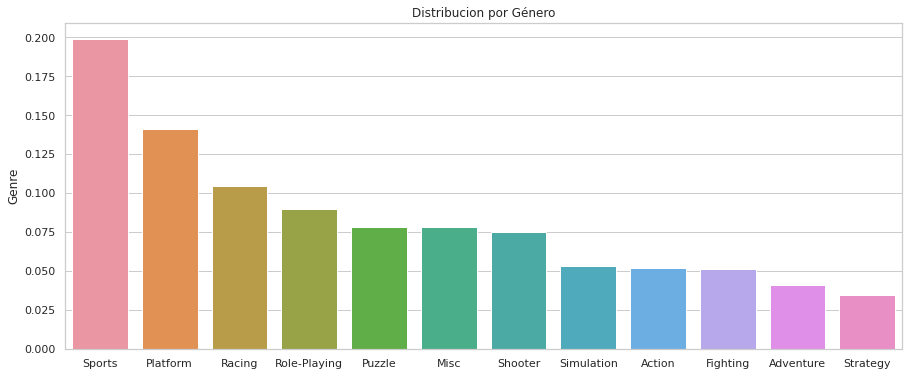

In [ ]:
plt.figure(figsize=(15, 6))
x=df["Genre"].unique()
y=df["Genre"].value_counts()/df["Genre"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Género')
plt.show()

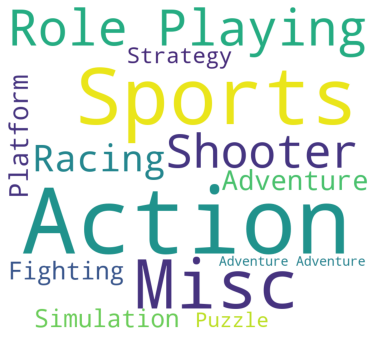

In [ ]:
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='White',width=800,height=720).generate(" ".join(df['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Por un lado se puede observar que el género más consumido es el de Deportes alcanzando casi el 20% del mercado, mientras lo siguen los juegos de Plataformas, Carreras y Role-Playing, y en menor medida Puzzle, Shooter, Acción, seguidos para nuestra sorpresa por Sports, Strategy, Adventure, Acción y Estrategia.

Cabe destacar la WordCloud anterior donde se puede indentificar que existe una importante cantidad de juegos de Acción ofrecida en el mercado, sin embargo, apenas logra abarcar el 5% de las ventas.

#####Feature: "Publisher"

Proporción de desarrolladores con más ventas:

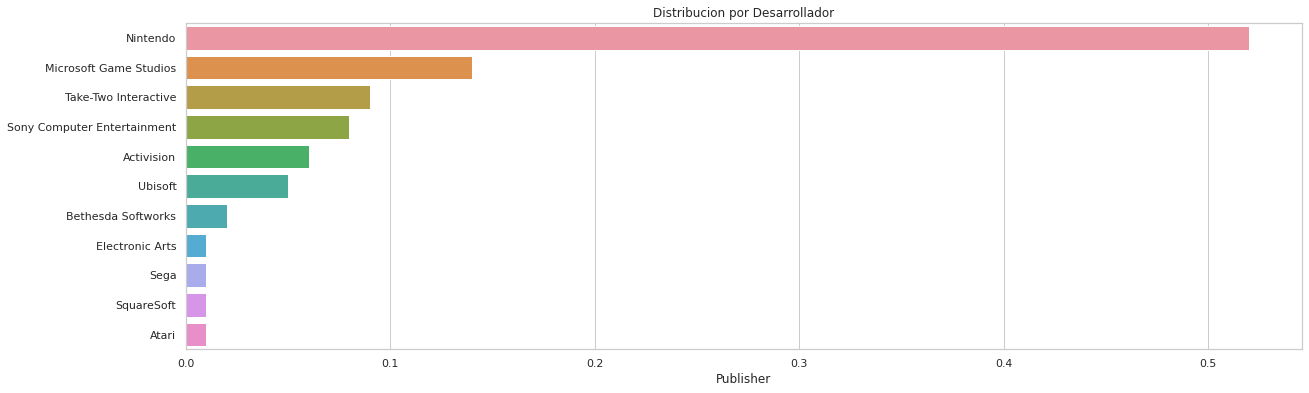

In [ ]:
plt.figure(figsize=(20, 6))
x=df.head(100)["Publisher"].unique()
y=df.head(100)["Publisher"].value_counts()/df.head(100)["Publisher"].value_counts().sum()
ax=sns.barplot(x=y, y=x)
ax.set_title('Distribucion por Desarrollador')
plt.show()

Se puede observar que el desarrollador que más juegos ha vendido a lo largo de la historia fue Nintendo (Así como también comprobamos anteriormente que es el que más plataformas ha ofrecido) con casi el 50% del mercado, seguido de Microsoft Game Studios con el 15% de las ventas, y en menor porcentaje los nuevos desarrolladores de juegos como Activision, Ubisoft y Electronic Arts.

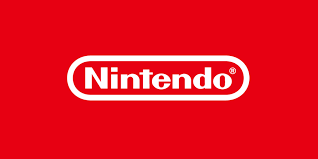







#####Evolución de las plataformas en el tiempo

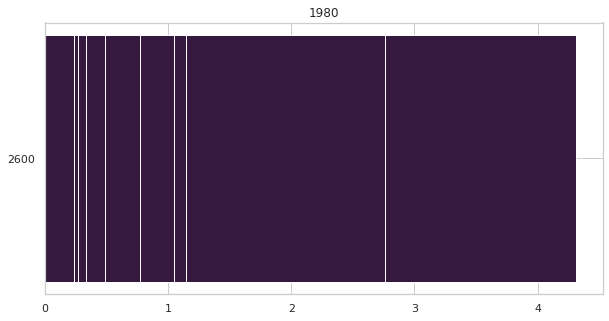

In [ ]:
from matplotlib import animation
years = df.sort_values("Year")['Year'].unique()

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]
  data_temp = df.loc[df['Year'] == year, :]
  ax.clear() #cada vez que haya una iteracion se limpiará el grafico
  ax.barh(data_temp.Platform,data_temp.Global_Sales)
  label.set_text(year)
  ax.set_title(str(year))

animacion = animation.FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000) 

In [ ]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

####Análisis descriptivo e inferencial bivariado

#####RECORD DE VENTAS POR REGIÓN:

######ESTADOS UNIDOS:

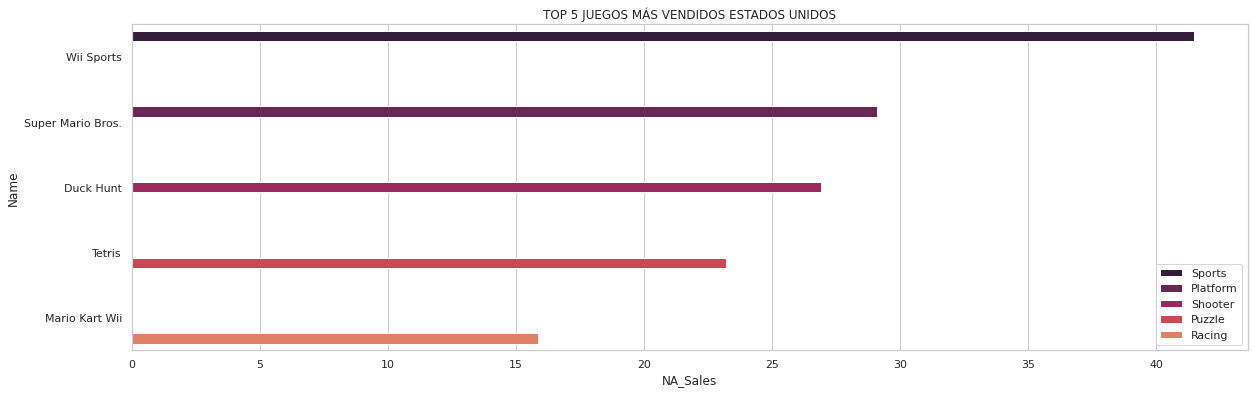

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='NA_Sales',hue='Genre',data=df.sort_values('NA_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

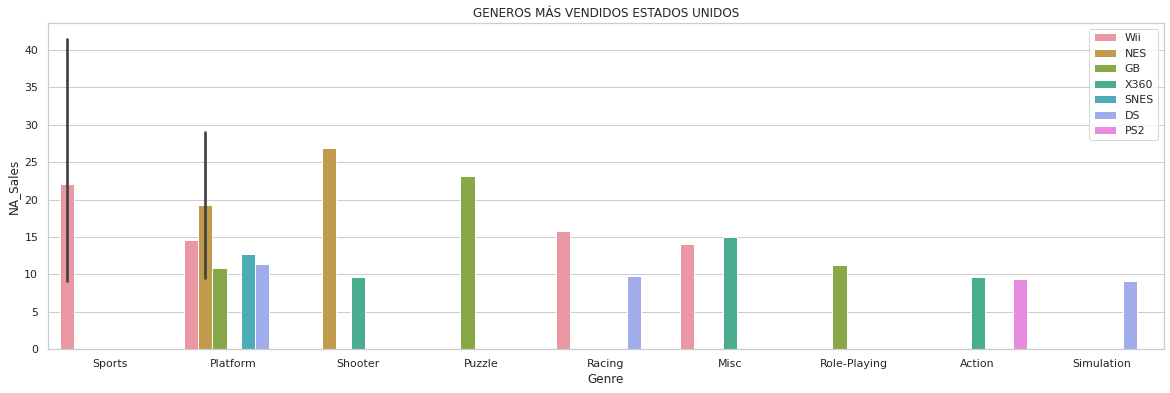

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

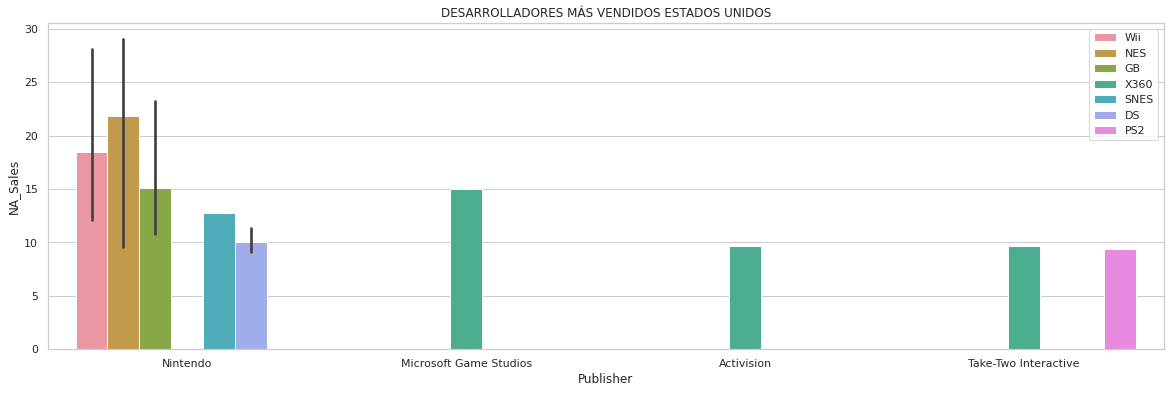

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

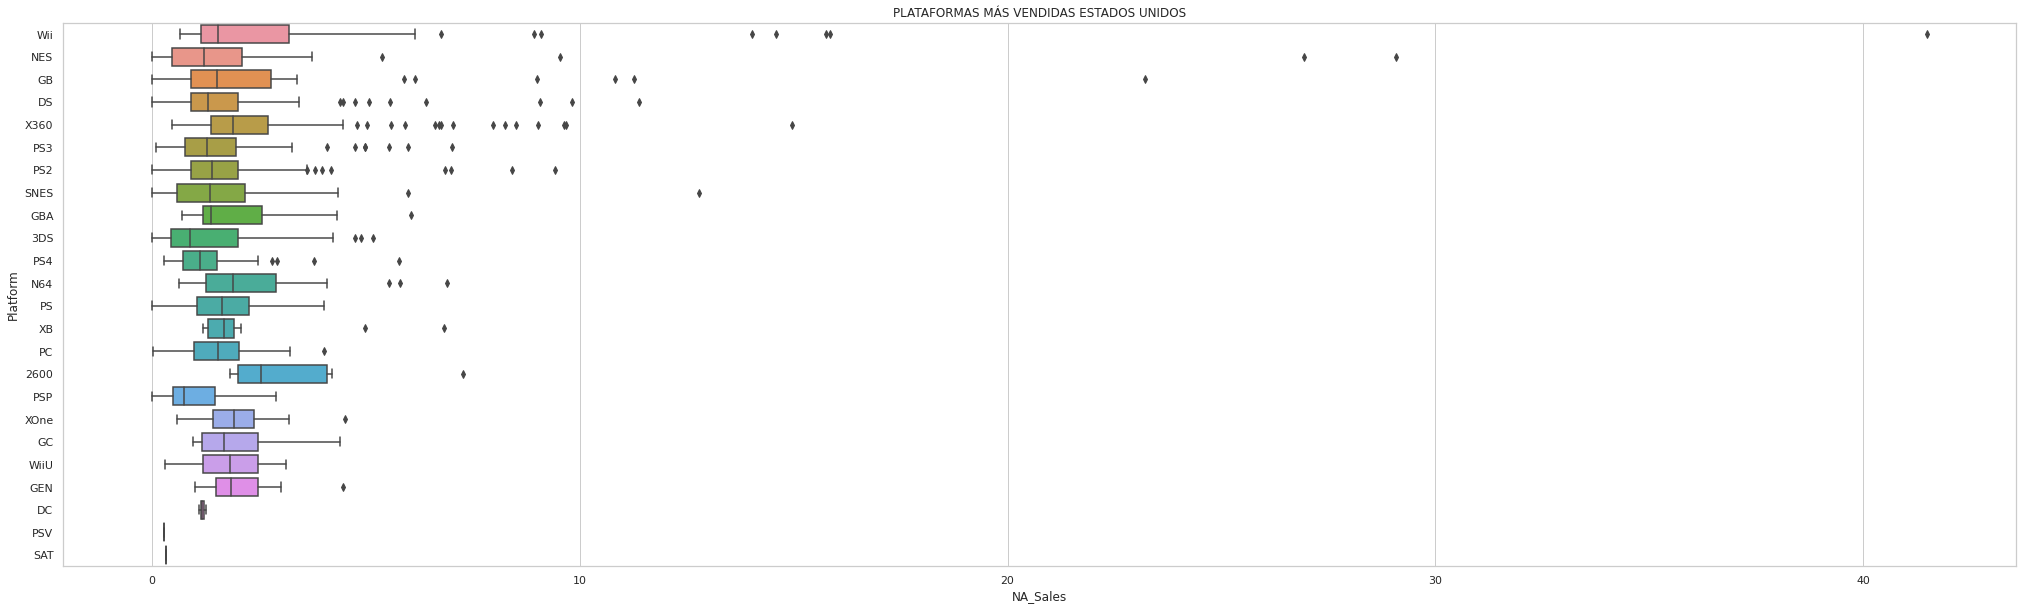

In [ ]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'NA_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS UNIDOS')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Estados Unidos se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con más de 40 millones en ventas.

También podemos observar que los americanos han tenido un consumo preferente por juegos y consolas de Nintendo, seguido de desarrollos propios del país producidos por Microsoft Games y Activision, acompañados por plataformas como XBox. 

Finalmente vemos que en Estados Unidos existe un consumo de juegos de género muy variado, liderando las ventas los juegos de Deporte, Plataforma y Shooter, que inclusive se ofertan para distintas consolas.

Es interesante ver que en Estados Unidos lideran los juegos y consolas japoneses, y cómo los juegos de deporte y disparos tienen gran relevancia.

######JAPÓN:

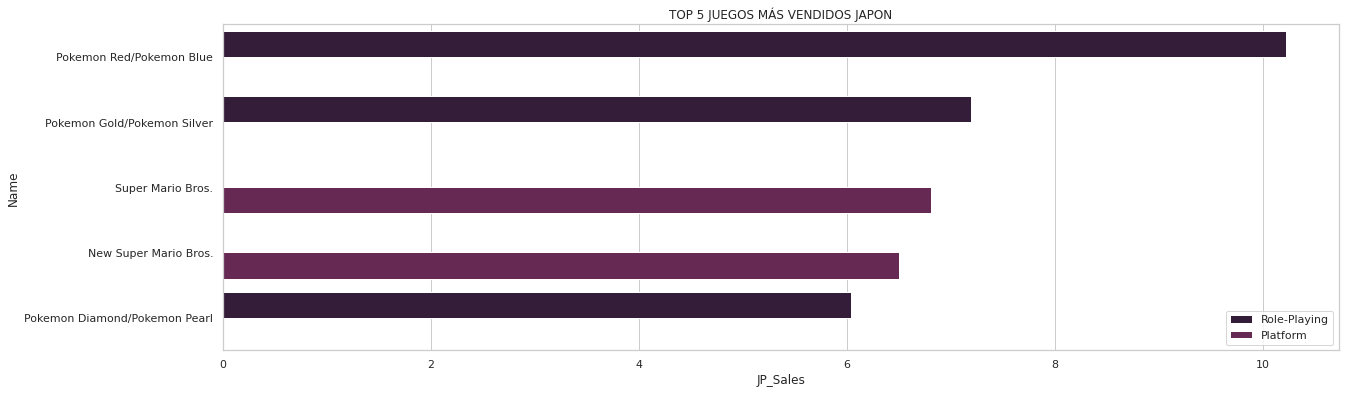

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='JP_Sales',hue='Genre',data=df.sort_values('JP_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS JAPON')
plt.legend()

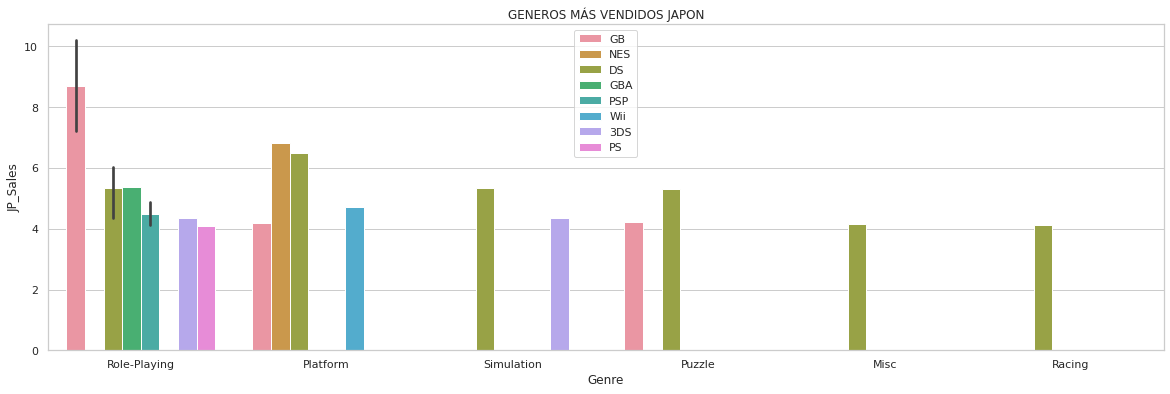

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS JAPON')
plt.legend()

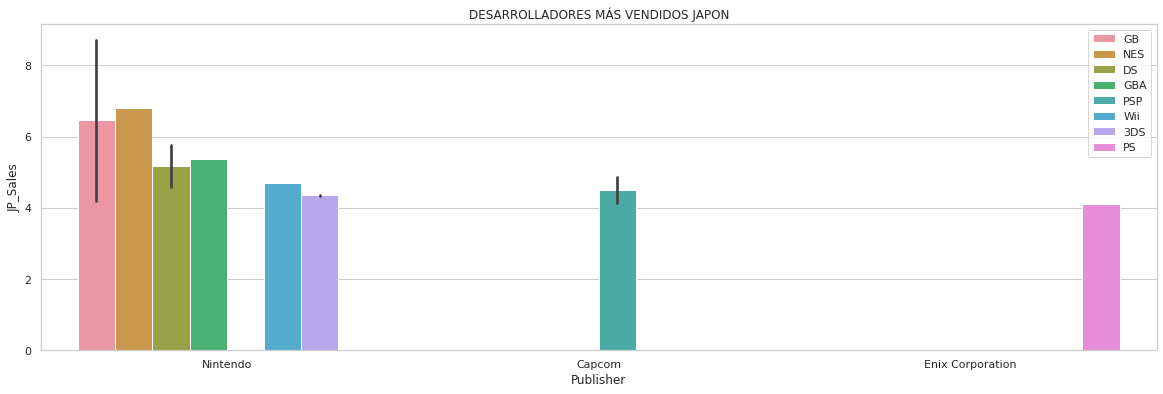

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS JAPON')
plt.legend()

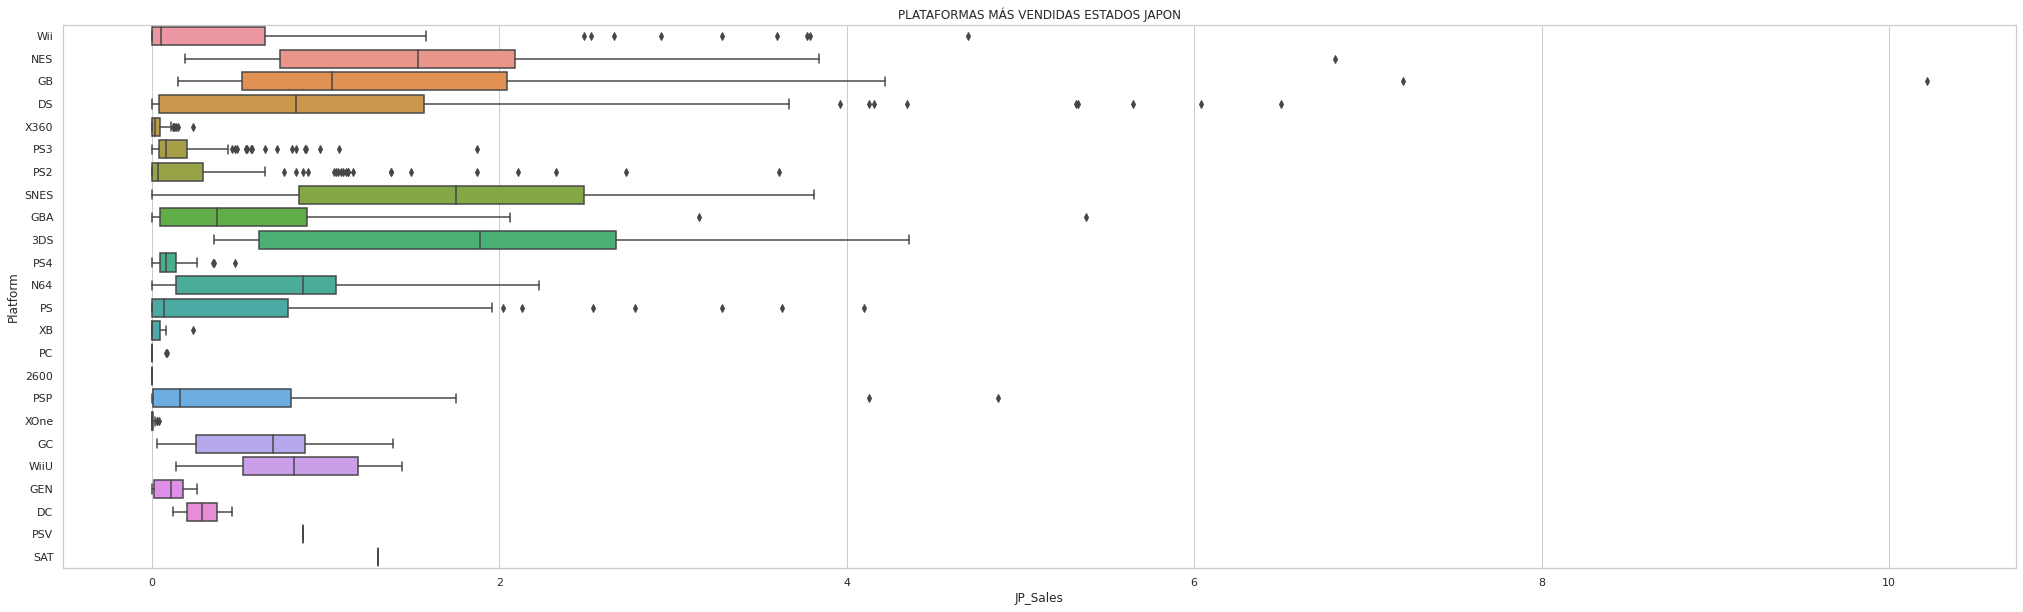

In [ ]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'JP_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS JAPON')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Japón se lo lleva el género de Role-Playing o RPG, más precisamente con los juegos Pokemon Red y Pokemos Blue con más de 10 millones en ventas.

También podemos observar que los japoneses han tenido un consumo preferente por juegos y consolas propios del país, producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores como Capcom que han tenido grandes entregas como Resident Evil y Street Fighter. 

Finalmente vemos que en Japón existe un consumo de juegos de género no tan variado, liderando las ventas los juegos de RPG, para todas las consolas disponibles de Nintendo. 
Cabe destacar a la Nintendo DS, que si bien no ha superado en ventas a la Nintendo NES o a la GameBoy, ha permanecido como plataforma definitiva para géneros menos populares como Simulación, Puzzle, Misc y Carreras.

Es interesante ver que en Japón lideran los juegos y consolas nacionales, notandose una menor diversidad de consumos de géneros, y cómo las plataformas de Estados Unidos han tenido apenas relevancia con ventas de la Playstation Vita, lo cual deja en evidencia que Japón tiene preferencia por plataformas portátiles.

######EUROPA:

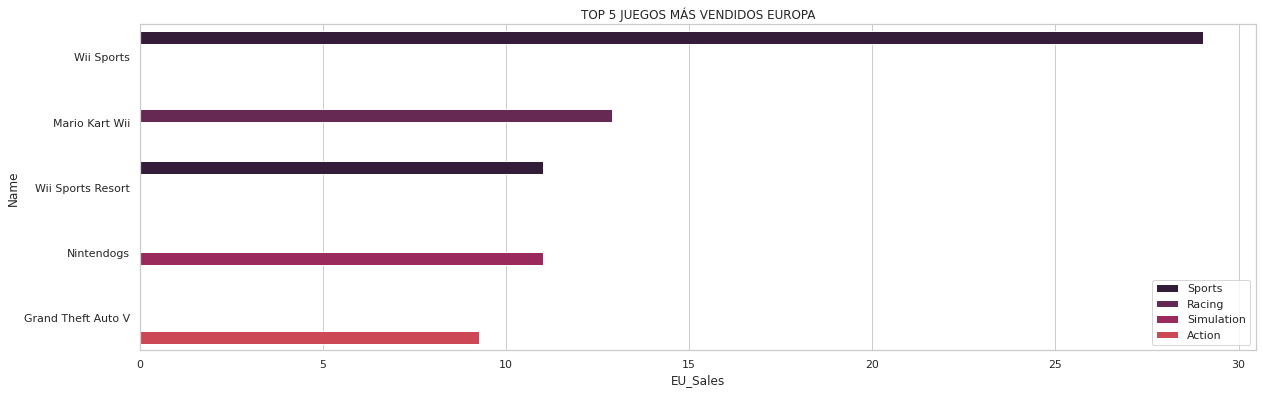

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='EU_Sales',hue='Genre',data=df.sort_values('EU_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS EUROPA')
plt.legend()

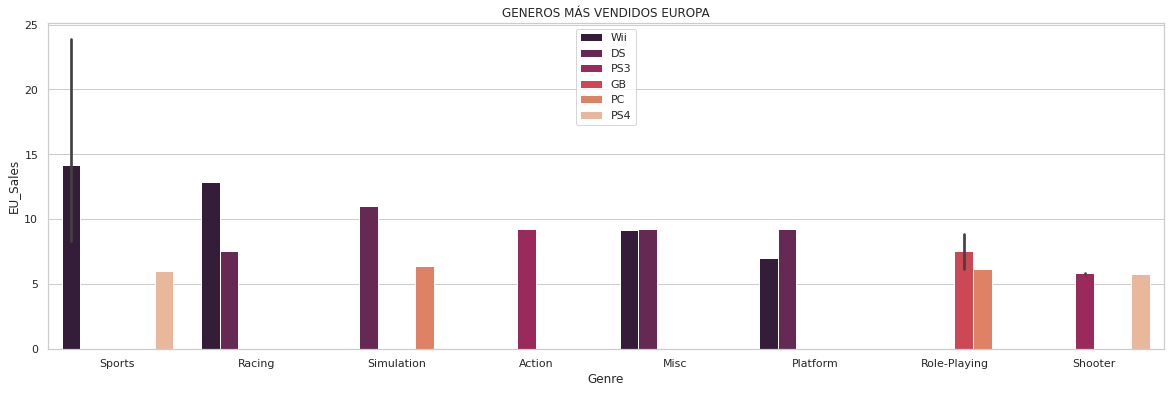

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS EUROPA')
plt.legend()

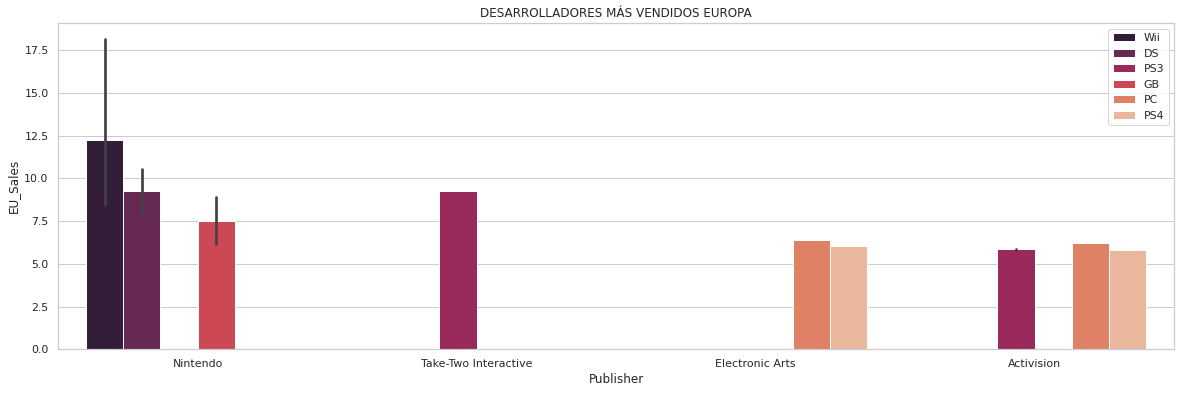

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS EUROPA')
plt.legend()

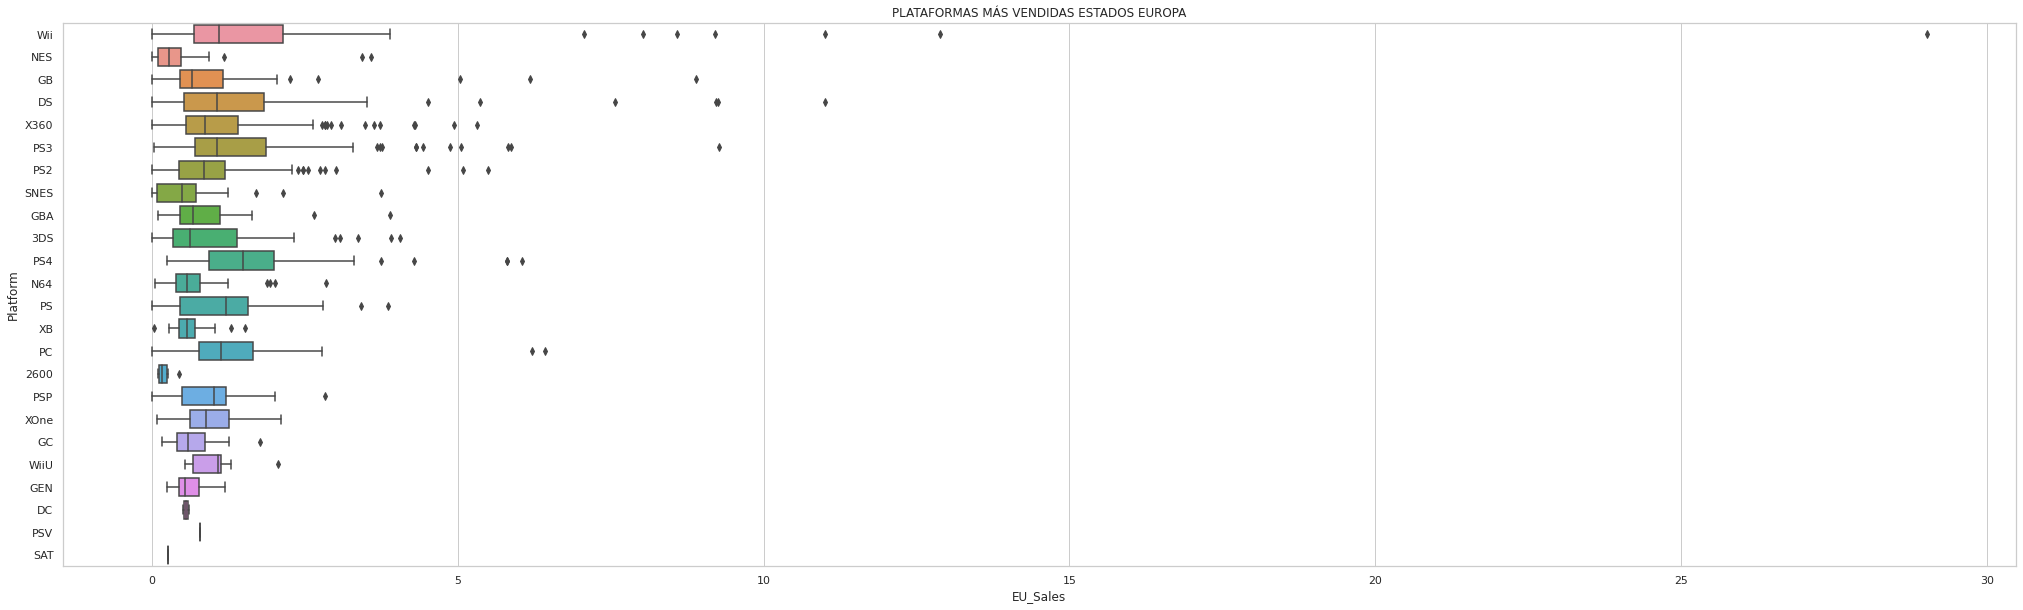

In [ ]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'EU_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS EUROPA')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Europa se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con casi 30 millones en ventas.

También podemos observar que los europeos han tenido un consumo muy parecido al de Estados Unidos, con una preferencia a juegos producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores americanos como Electronic Arts y Activision que ya habíamos mencionado anteriormente. 

Finalmente vemos que en Europa existe un consumo bastante parejo de juegos, pero con géneros muy variado, casi como si se aceptara lo mejor de Estados Unidos y lo mejor de Japón, liderando las ventas los juegos de Deportes, Carreras, Simulación y Acción, en donde compiten plataformas como Nintendo y Playstation.
Cabe destacar que ha aparecido la PC como plataforma de juegos, que si bien no ha superado en ventas a la Nintendo o la Playstation, ha permanecido como alternativa a las plataformas antes menciondas, gracias a la posibilidad de permitir jugar juegos de cualquier desarrollador sea de Nintendo, Sony o Microsoft.

Es interesante ver que en Europa lideran los juegos y consolas japoneses, pero a diferencia de Estados Unidos o Japón, los europeos consumen una mayor diversidad de géneros y plataformas, teniendo preferencia por géneros que tengan cierto vínculo con la realidad como Deportes, Carreras y Simulación. 

####Análisis descriptivo e inferencial multivariado

#####CANTIDAD DE JUEGOS POR PLATAFORMA:

In [ ]:
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0      Wii     41.49     29.02      3.77         8.46
1      NES     29.08      3.58      6.81         0.77
2      Wii     15.85     12.88      3.79         3.31
3      Wii     15.75     11.01      3.28         2.96
4       GB     11.27      8.89     10.22         1.00

In [ ]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_table1 = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table1.head()

Platform Sale_Area  Sale_Price
0     2600  NA_Sales       80.78
1      3DO  NA_Sales        0.00
2      3DS  NA_Sales       78.03
3       DC  NA_Sales        5.43
4       DS  NA_Sales      388.56

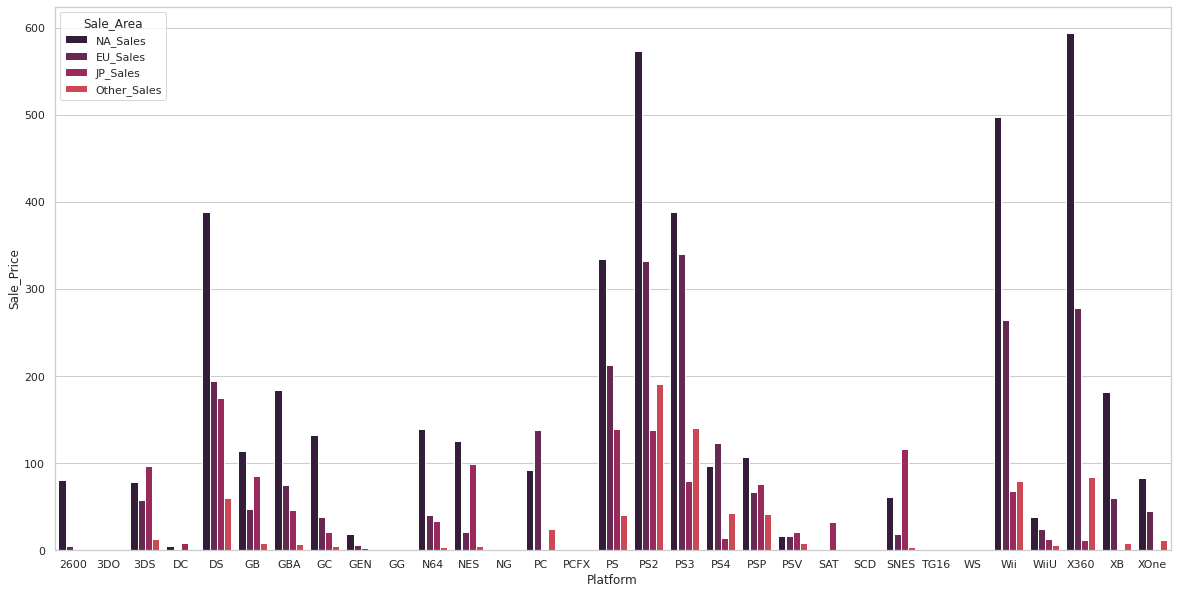

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table1)
plt.show()

Podemos observar como la PS2 y la DS son las plataformas que más juegos tienen en el mercado, esto se puede deber a la antigüedad en el mercado de las consolas. Lo que nos lleva automáticamente a pensar que son consolas fuertes en sus ventas debido a la gran oferta de juegos que tienen disponibles.

Esta claro que la XBox360, la Nintendo Wii, las Playstation 1, 2 y 3 y la Nintendo DS son los líderes del mercado, con Estados Unidos como el máximo consumidor de estas plataformas.

Ninguna de ellas es la consola de última generación, lo que se puede deber a dos principales características, el tiempo que las consolas tienen en el mercado es superior a las consolas de última generación como la PS4 y la accesibilidad económica es superior a estas también.


#####VENTAS DE JUEGOS POR GÉNERO A NIVEL MUNDIAL:


In [ ]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_genre.head()

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0        Sports     41.49     29.02      3.77         8.46
1      Platform     29.08      3.58      6.81         0.77
2        Racing     15.85     12.88      3.79         3.31
3        Sports     15.75     11.01      3.28         2.96
4  Role-Playing     11.27      8.89     10.22         1.00

In [ ]:
comp_genre = comp_genre.groupby(by=['Genre']).sum().reset_index()
comp_table2 = pd.melt(comp_genre, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table2.head()

Genre Sale_Area  Sale_Price
0     Action  NA_Sales      861.80
1  Adventure  NA_Sales      102.06
2   Fighting  NA_Sales      220.74
3       Misc  NA_Sales      402.48
4   Platform  NA_Sales      445.99

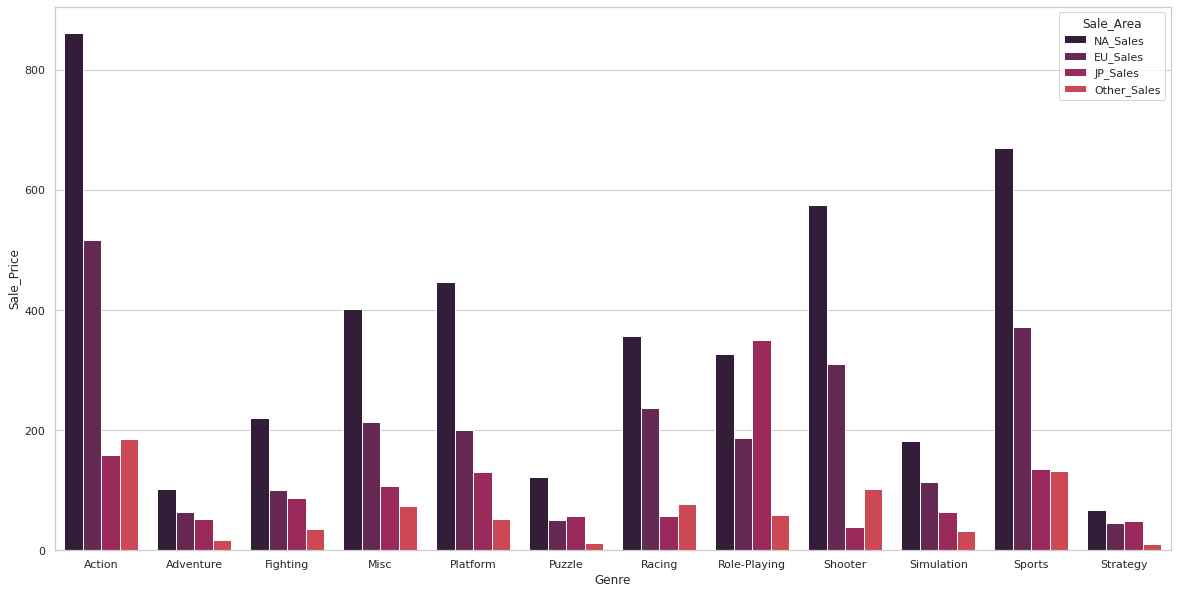

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table2)
plt.show()

A partir del gráfico podemos ver cómo los juegos RPG (o Role-Playing) son los únicos en los cuales las ventas en Japón superan a Estados Unidos. Esto habla del tamaño superior de ventas de Estados Unidos frente a los otros mercados.

En los demás géneros, se puede apreciar cierta similitud en consumo, donde lidera Estados Unidos, esto significa que si un género fue record de ventas, lo fue tanto en Estados Unidos como en Europa. Inclusive en los géneros Acción, Shooter y Racing las ventas alrededor del mundo fueron aún mayores que en Japón.

Podemos afirmar cómo el mercado europeo es similar en gustos y características al mercado de Estados Unidos y a su vez estos son bastante diferentes a los gustos del mercado japonés.

Finalmente, es notoria la popularidad que tienen juegos de Acción, Deportes y Shooter en el mercado. Si se quisiera desarrollar un nuevo juego con posibilidad de tener un gran mercado para insertarse, sería ideal que pertenezca a alguno de los géneros antes mencionados.

### ***5) Distribución e identificación de Outliers***

Posterior al analisis generalizado del contexto de la base de datos continuamos con la preparación del dataset observando la distibución de datos así como la existencia de outliers que debamos eliminar para no tener un impacto negativo en nuestro análisis para posteriormente volver a analizar cuanto se modifico su comportamiento.

####Analizaremos las variables relacionadas con la cantidad de ventas de videojuegos por año:



Text(0, 0.5, 'Ventas en por año')

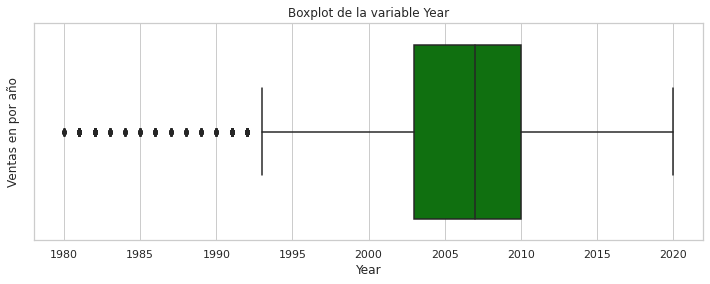

In [ ]:
#Se grafica las variables de cantidad de ventas para detectar outliers.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x=df["Year"], data=df, color='green')
plt.title('Boxplot de la variable Year')
ax.set_ylabel('Ventas en por año')

Podemos observar que en los percentiles inferiores hay outliers, pero además, los datos no son relevantes para nuestro análisis, ya que la mayoría de consolas y desarrolladores de juegos de antes del 2000 ya no se encuentran vigentes, por lo que es necesario realizar alguna corrección.

In [ ]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 30% y 90% e iremos cambiando para encontrar los outliers más distorsivos 
p30 = np.percentile(df['Year'], 30)
p90 = np.percentile(df['Year'], 99)

In [ ]:
dfp30=df[(df['Year'] <= p30)]
dfp30['Year'].describe()

count    5172.000000
mean     1999.631477
std         4.526285
min      1980.000000
25%      1998.000000
50%      2001.000000
75%      2003.000000
max      2004.000000
Name: Year, dtype: float64

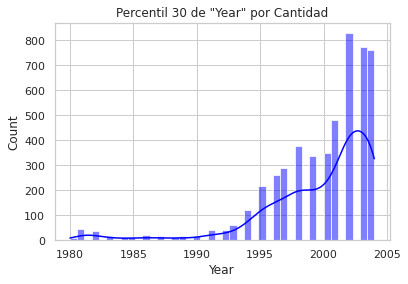

In [ ]:
#Histograma de ventas del percentil 30
sns.histplot(dfp30['Year'], color='blue',kde=True).set(title='Percentil 30 de "Year" por Cantidad')
plt.show()

In [ ]:
dfp90=df[(df['Year'] >= p90)]
dfp90['Year'].describe()

count     348.000000
mean     2016.020115
std         0.233129
min      2016.000000
25%      2016.000000
50%      2016.000000
75%      2016.000000
max      2020.000000
Name: Year, dtype: float64

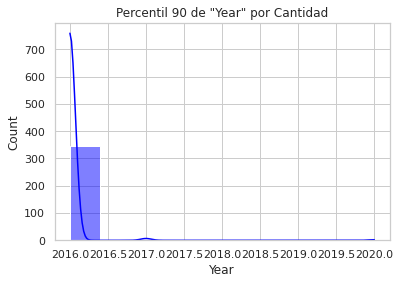

In [ ]:
#Histograma de ventas del percentil 90
sns.histplot(dfp90['Year'],color='blue',kde=True).set(title='Percentil 90 de "Year" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [ ]:
df = df[(df['Year'] >= p30) & (df['Year'] <= p90)]

In [ ]:
df['Year'].describe()

count    11914.000000
mean      2009.189609
std          3.213031
min       2004.000000
25%       2007.000000
50%       2009.000000
75%       2011.000000
max       2016.000000
Name: Year, dtype: float64

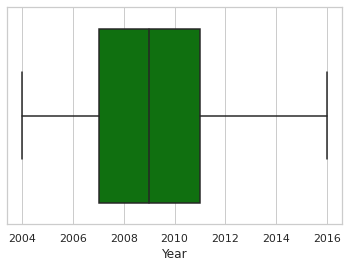

In [ ]:
ax = sns.boxplot(x=df['Year'], data=df,color='green')

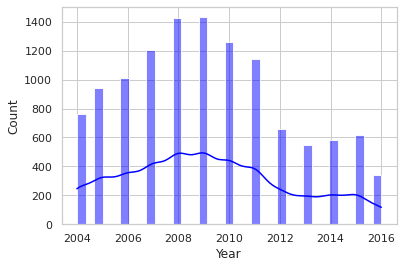

In [ ]:
ax = sns.histplot(df['Year'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot simétricos que muestran que quedaron limpios de outliers que distorsionen nuestro análisis.



####Analisis generalizado posterior a la eliminacion de Outliers.

Verificaremos como quedo el DataBase posterior a la eliminacion de los datos mas distorisivos.

In [ ]:
df

Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
...      ...                                                ...      ...   
16590  16593  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
16591  16594                                Myst IV: Revelation       PC   
16592  16595                                           Plushees       DS   
16595  16598   SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                         Know How 2       DS   

       Year         Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006        Sports            Nintendo     41.49     29.02      3.77   
2      2008        Racing            Nintendo     15.85     12.88      3.79   
3      2009        Sports            Nintendo     15.75     11.01      3.28   
6      2006      Platform            Nintendo     11.38      9.23      6.50   
7      2006          Misc            Nintendo     14.03      9.20      2.93   
...     ...           ...                 ...       ...       ...       ...   
16590  2007  Role-Playing  Falcom Corporation      0.00      0.00      0.01   
16591  2004     Adventure             Ubisoft      0.01      0.00      0.00   
16592  2008    Simulation           Destineer      0.01      0.00      0.00   
16595  2008        Racing          Activision      0.00      0.00      0.00   
16596  2010        Puzzle            7G//AMES      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
2             3.31         35.82  
3             2.96         33.00  
6             2.90         30.01  
7             2.85         29.02  
...            ...           ...  
16590         0.00          0.01  
16591         0.00          0.01  
16592         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  

[11914 rows x 11 columns]

Podemos verificar que se redujeron los datos que no cumplian con las condiciones marcadas anteriormente, finalmente nos quedamos con un total de 10374 filas y 11 columnas. Posteriormente realizaremos un analisis con graficos generalizados para poder verificar el comportamiento de los datos.

<ipython-input-42-0213f8071006>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new = df.groupby(['Genre'])['NA_Sales', 'EU_Sales','JP_Sales',].sum()


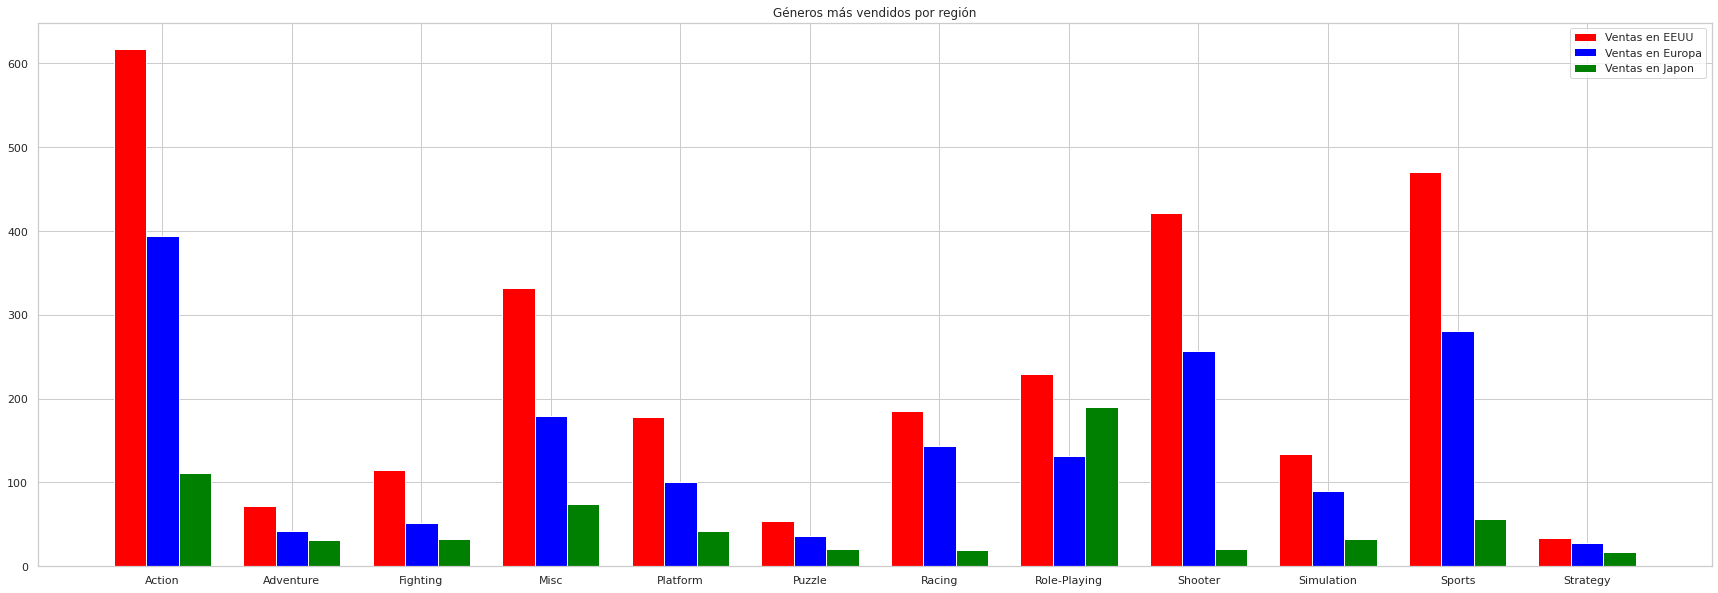

In [ ]:
df_new = df.groupby(['Genre'])['NA_Sales', 'EU_Sales','JP_Sales',].sum()
n = len(df_new.index)
x = np.arange(n)
width = 0.25
fig, ax = plt.subplots(figsize=(30,10))
plt.title('Géneros más vendidos por región')
plt.bar(x - width, df_new.NA_Sales, width=width, label='Ventas en EEUU', color = 'red')
plt.bar(x, df_new.EU_Sales, width=width, label='Ventas en Europa', color = 'blue')
plt.bar(x + width, df_new.JP_Sales, width=width, label='Ventas en Japon', color = 'green')
plt.xticks(x, df_new.index)
plt.legend(loc='best')
plt.show()

En las graficas brindadas podemos ver principalmente las apariciones de los generos mas cotizados donde lleva la delantera los juegos de tipo Sports, Action y Shooter liderando con un fuerte recuento.

Teniendo en cuenta nuestro análisis anterior, el género más recomendado para acceder al mercado de Estados Unidos, Europa y Japón sería el de Sports.

Text(0.5, 0, 'Género')

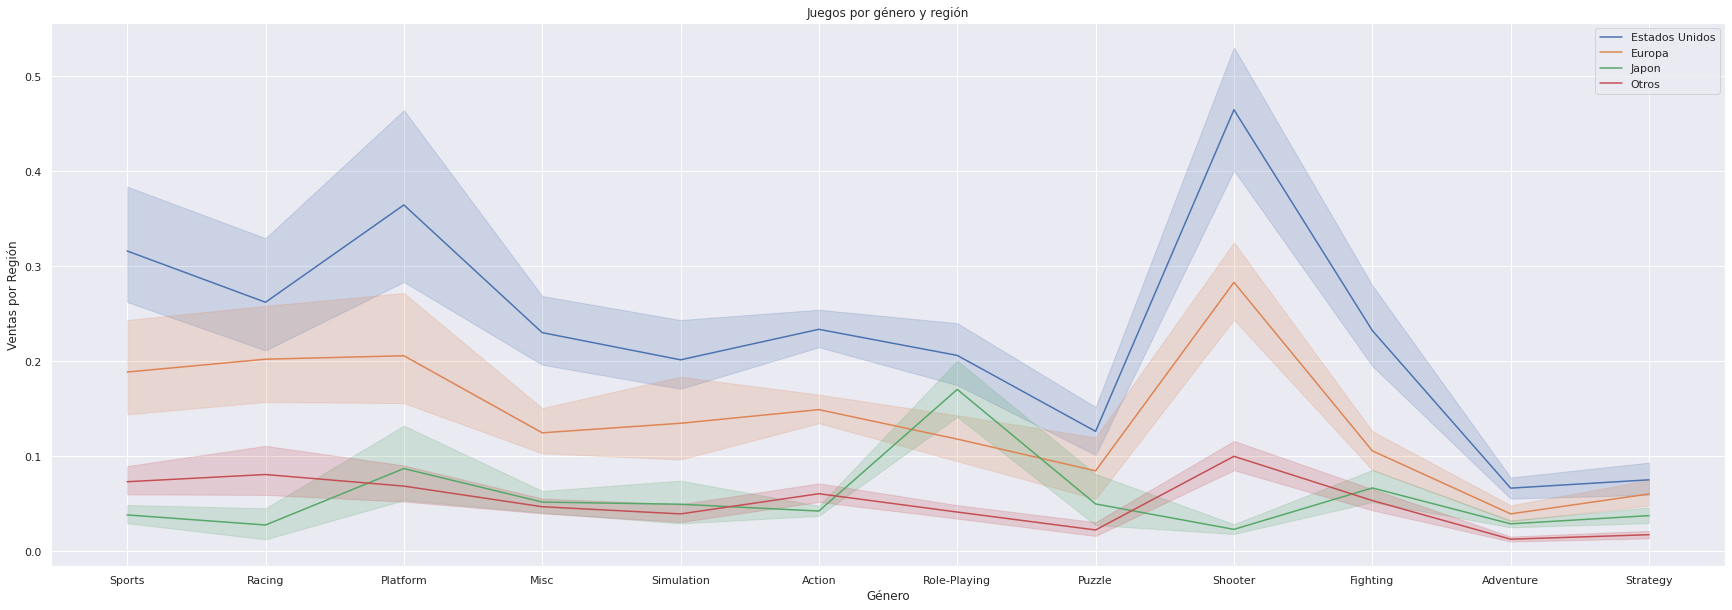

In [ ]:
sns.set(rc = {'figure.figsize':(30,10)})
sns.lineplot(data=df, x='Genre', y="NA_Sales")
sns.lineplot(data=df, x='Genre', y="EU_Sales")
sns.lineplot(data=df, x='Genre', y='JP_Sales')
sns.lineplot(data=df, x='Genre', y='Other_Sales')
plt.legend(labels=["Estados Unidos","Europa","Japon", "Otros"])
plt.title("Juegos por género y región")
plt.ylabel("Ventas por Región")
plt.xlabel("Género")

Esta visualizacion nos permite confirmar el comportamiento a nivel de consumo seccionado por genero segun la región. Para el mismo confirmamos que Europa y Norte America definen gustos similares en cuanto a cantidad de géneros consumidos como se mecionó anteriormente, mientras que en Japón existe un gran consumo de juegos de tipo Role-Playing.

Text(0.5, 0, 'Plataforma')

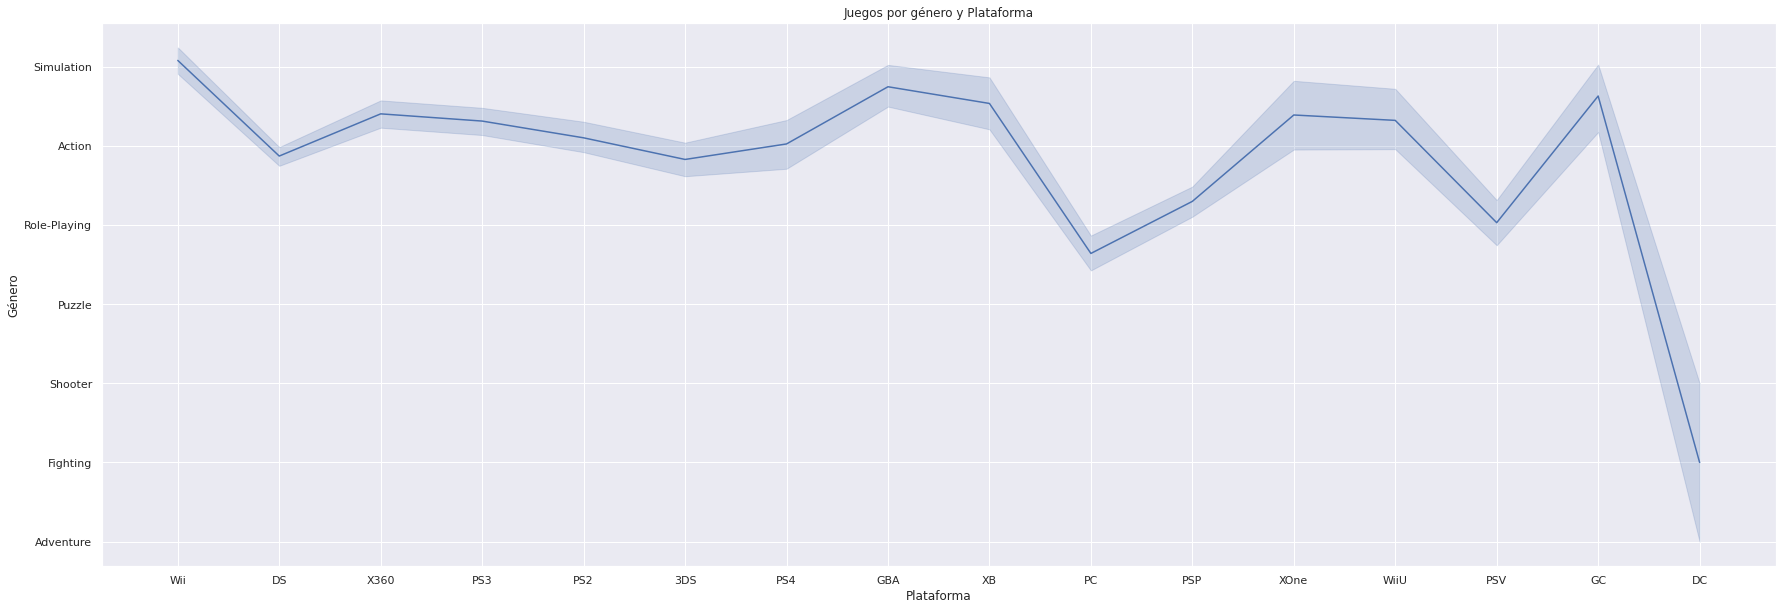

In [ ]:
sns.lineplot(data=df, x='Platform', y="Genre")
sns.set(rc = {'figure.figsize':(30,10)})
plt.title("Juegos por género y Plataforma")
plt.ylabel("Género")
plt.xlabel("Plataforma")

Este grafico nos permite diferenciar el comportamiento entre las plataformas y los generos, esto nos permite identificar el como cada consola es centrada a un determinado enfoque de tipo de genero en cuanto al juego.

[]

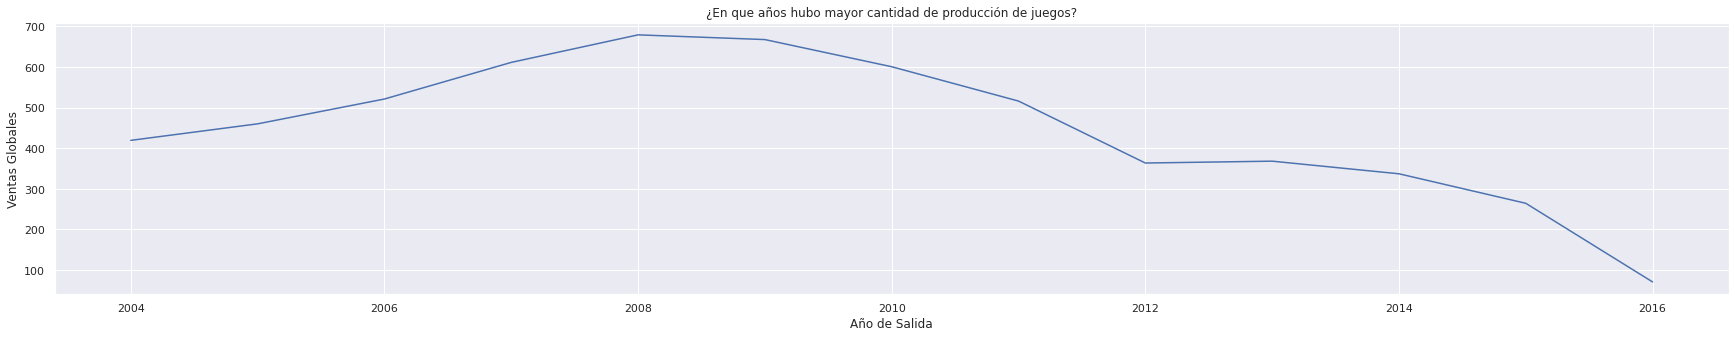

In [ ]:
df_1 = df[['Global_Sales','Year']].groupby(by='Year').sum('Global_Sales')
df_1
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(df_1.index,df_1.Global_Sales)
ax.set_xlabel('Año de Salida')                  
ax.set_ylabel('Ventas Globales')
ax.set_title('¿En que años hubo mayor cantidad de producción de juegos?')
plt.plot()

Esta visualización nos permite ver el comportamiento de la cantidad de lanzamientos que se registraron por año, viendo las grandes confluencias con los mayores parametros en aumento hasta el año 2008, para posteriormente pasar a una tendencia bajista hasta la actualidad.

In [ ]:
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
year_wise_sales = df.loc[:, ['Name', 'Year', 'NA_Sales', 'EU_Sales', 
                             'JP_Sales', 'Other_Sales']].groupby(by =  'Year'  ).sum()
fig1 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['NA_Sales'],
                  name = "Ventas en Estados Unidos",line_shape='vh' )
fig2 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['EU_Sales'],
                  name = "Ventas en Europa",line_shape='vh')
fig3 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['JP_Sales'],
                  name = "Ventas en Japón",line_shape='vh')
fig4 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['Other_Sales'],
                  name = "Otras ventas",line_shape='vh')

figs = [ fig1, fig2, fig3, fig4 ]
layout = dict(title = 'Cantidad de Ventas totales por año según su región.',
              xaxis= dict(title= 'Año' ), yaxis= dict(title= 'Total de ventas en millones',))

figure = dict(data = figs, layout = layout)
iplot(figure)

Esta visualizacion nos permite verificar de manera mas detallada el comportamiento diferenciado por zona según la cantidad de ventas, donde verificamos un comportamiento bastante similar entre Europa y Norte America, mientras que en ciertos períodos la cantidad de ventas en del resto del mundo supera a las de Japón.

# **Feature Engineering.**

##ENCODING:

Procederemos a realizar el armado del dataset final, con el cual generaremos nuestro modelo predictivo.

In [ ]:
df

Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
...      ...                                                ...      ...   
16590  16593  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
16591  16594                                Myst IV: Revelation       PC   
16592  16595                                           Plushees       DS   
16595  16598   SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                         Know How 2       DS   

       Year         Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006        Sports            Nintendo     41.49     29.02      3.77   
2      2008        Racing            Nintendo     15.85     12.88      3.79   
3      2009        Sports            Nintendo     15.75     11.01      3.28   
6      2006      Platform            Nintendo     11.38      9.23      6.50   
7      2006          Misc            Nintendo     14.03      9.20      2.93   
...     ...           ...                 ...       ...       ...       ...   
16590  2007  Role-Playing  Falcom Corporation      0.00      0.00      0.01   
16591  2004     Adventure             Ubisoft      0.01      0.00      0.00   
16592  2008    Simulation           Destineer      0.01      0.00      0.00   
16595  2008        Racing          Activision      0.00      0.00      0.00   
16596  2010        Puzzle            7G//AMES      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
2             3.31         35.82  
3             2.96         33.00  
6             2.90         30.01  
7             2.85         29.02  
...            ...           ...  
16590         0.00          0.01  
16591         0.00          0.01  
16592         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  

[11914 rows x 11 columns]

In [ ]:
#Tomamos las features principales que nos interesan
df0 = pd.DataFrame(df[['Platform','Year','Publisher','Genre',"NA_Sales","EU_Sales","JP_Sales","Other_Sales", "Global_Sales"]])
# df0 = df0[df0['Global_Sales']>=1]
df0

Platform  Year           Publisher         Genre  NA_Sales  EU_Sales  \
0          Wii  2006            Nintendo        Sports     41.49     29.02   
2          Wii  2008            Nintendo        Racing     15.85     12.88   
3          Wii  2009            Nintendo        Sports     15.75     11.01   
6           DS  2006            Nintendo      Platform     11.38      9.23   
7          Wii  2006            Nintendo          Misc     14.03      9.20   
...        ...   ...                 ...           ...       ...       ...   
16590      PSP  2007  Falcom Corporation  Role-Playing      0.00      0.00   
16591       PC  2004             Ubisoft     Adventure      0.01      0.00   
16592       DS  2008           Destineer    Simulation      0.01      0.00   
16595      PS2  2008          Activision        Racing      0.00      0.00   
16596       DS  2010            7G//AMES        Puzzle      0.00      0.01   

       JP_Sales  Other_Sales  Global_Sales  
0          3.77         8.46         82.74  
2          3.79         3.31         35.82  
3          3.28         2.96         33.00  
6          6.50         2.90         30.01  
7          2.93         2.85         29.02  
...         ...          ...           ...  
16590      0.01         0.00          0.01  
16591      0.00         0.00          0.01  
16592      0.00         0.00          0.01  
16595      0.00         0.00          0.01  
16596      0.00         0.00          0.01  

[11914 rows x 9 columns]

Como existen una gran variedad de consolas de juegos que resultan poco relevantes, generalizaremos dichas consolas mediante 5 grupos: Playstatiom, Xbox, Pc, Nintendo y Portátiles.

In [ ]:
df0["Platform"].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'GBA', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'PSV', 'GC', 'DC'], dtype=object)

In [ ]:
platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

In [ ]:
def donut_chart(column, palette="Set2"):
    values = column.value_counts().values
    labels = column.value_counts().index
    plt.pie(values, colors=sns.color_palette(palette), 
            labels=labels, autopct="%1.1f%%", 
            startangle=90, pctdistance=0.85)
    #draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

Podemos observar la distribución de consolas existentes en nuestro dataset:

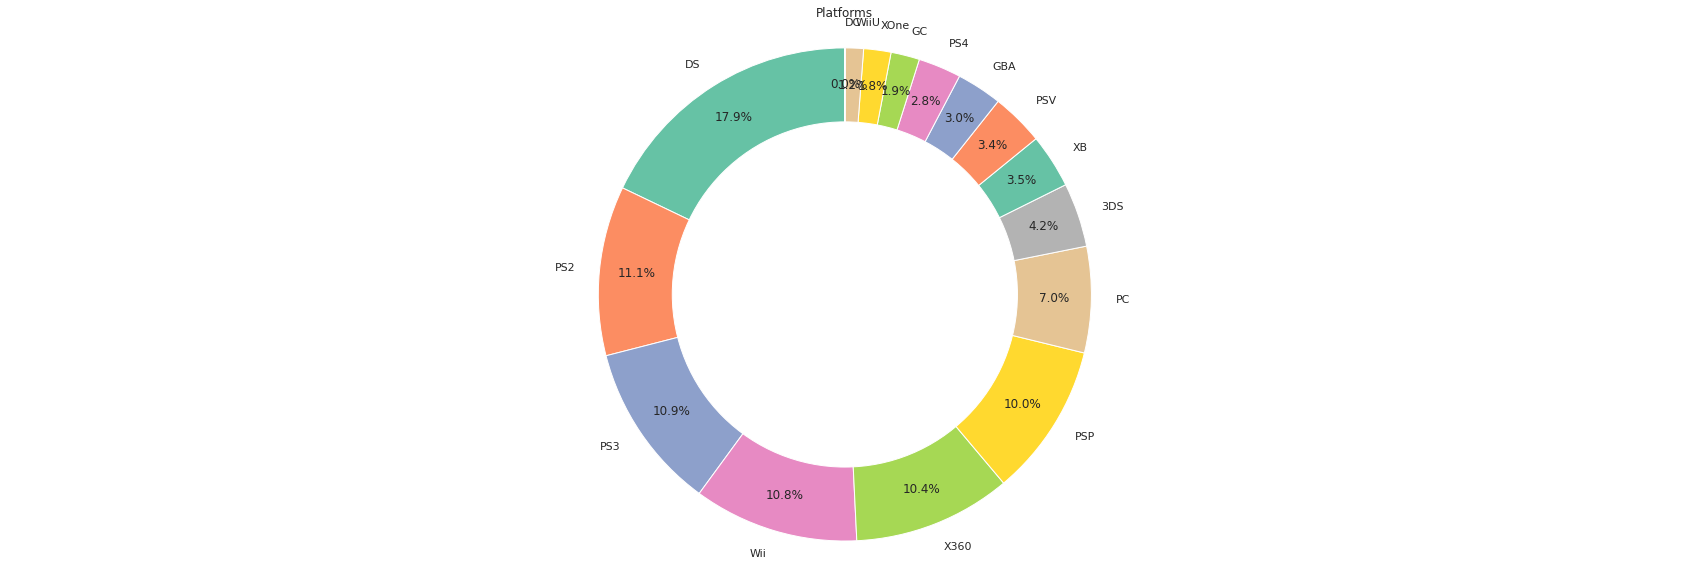

In [ ]:
donut_chart(df0["Platform"])
plt.title("Platforms")
plt.axis("equal");

In [ ]:
def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

Y ahora podemos visualizar la generalización de consolas en grupos que resultan de nuestro interés:

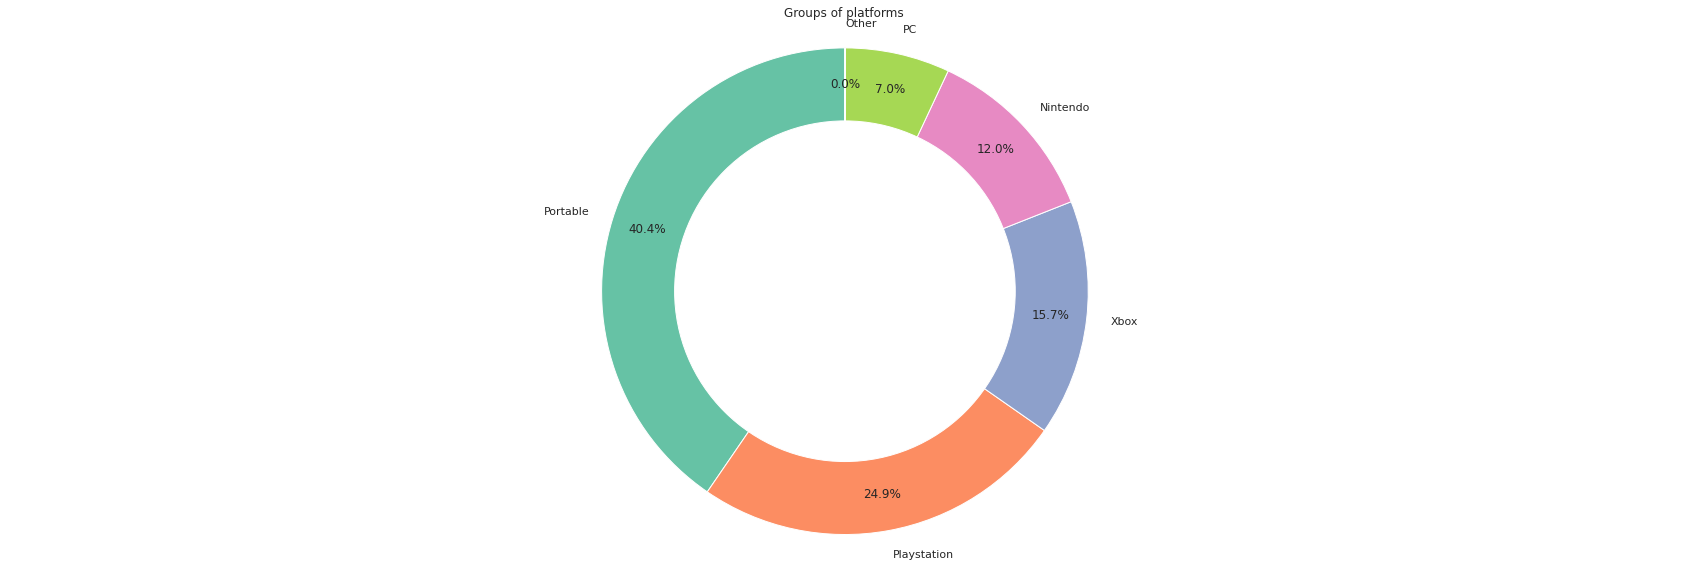

In [ ]:
df0["Grouped_Platform"] = df0["Platform"].apply(lambda x: get_group_label(x, groups=platforms))
donut_chart(df0["Grouped_Platform"])
plt.title("Groups of platforms")
plt.axis("equal");

In [ ]:
df0 = df0.drop(['Platform'], 1)

Convertimos las variables categóricas a numéricas para posteriormente realizar la reducción de dimensionalidad:

In [ ]:
def createdummies(df0,varname):
    dummy = pd.get_dummies(df0[varname], prefix = varname)
    df0 = df0.drop(varname, axis = 1)
    df0 = pd.concat([df0, dummy], axis = 1)
    return df0

In [ ]:
df0 = createdummies(df0,"Genre")
df0 = createdummies(df0,"Publisher")
df0 = createdummies(df0,"Year")
df0 = createdummies(df0,"Grouped_Platform")
df0

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Genre_Action  \
0         41.49     29.02      3.77         8.46         82.74             0   
2         15.85     12.88      3.79         3.31         35.82             0   
3         15.75     11.01      3.28         2.96         33.00             0   
6         11.38      9.23      6.50         2.90         30.01             0   
7         14.03      9.20      2.93         2.85         29.02             0   
...         ...       ...       ...          ...           ...           ...   
16590      0.00      0.00      0.01         0.00          0.01             0   
16591      0.01      0.00      0.00         0.00          0.01             0   
16592      0.01      0.00      0.00         0.00          0.01             0   
16595      0.00      0.00      0.00         0.00          0.01             0   
16596      0.00      0.01      0.00         0.00          0.01             0   

       Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  ...  \
0                    0               0           0               0  ...   
2                    0               0           0               0  ...   
3                    0               0           0               0  ...   
6                    0               0           0               1  ...   
7                    0               0           1               0  ...   
...                ...             ...         ...             ...  ...   
16590                0               0           0               0  ...   
16591                1               0           0               0  ...   
16592                0               0           0               0  ...   
16595                0               0           0               0  ...   
16596                0               0           0               0  ...   

       Year_2013  Year_2014  Year_2015  Year_2016  Grouped_Platform_Nintendo  \
0              0          0          0          0                          1   
2              0          0          0          0                          1   
3              0          0          0          0                          1   
6              0          0          0          0                          0   
7              0          0          0          0                          1   
...          ...        ...        ...        ...                        ...   
16590          0          0          0          0                          0   
16591          0          0          0          0                          0   
16592          0          0          0          0                          0   
16595          0          0          0          0                          0   
16596          0          0          0          0                          0   

       Grouped_Platform_Other  Grouped_Platform_PC  \
0                           0                    0   
2                           0                    0   
3                           0                    0   
6                           0                    0   
7                           0                    0   
...                       ...                  ...   
16590                       0                    0   
16591                       0                    1   
16592                       0                    0   
16595                       0                    0   
16596                       0                    0   

       Grouped_Platform_Playstation  Grouped_Platform_Portable  \
0                                 0                          0   
2                                 0                          0   
3                                 0                          0   
6                                 0                          1   
7                                 0                          0   
...                             ...                        ...   
16590                             0                          1   
16591  

Obtuvimos un nuevo dataset el cual posee 439 features que necesitamos reducir para lograr un modelo óptimo con las variables principales que afectan nuestros datos.

##REDUCCIÓN DE DIMENSIONALIDAD

Tal como mencionamos anteriormente, necesitamos reducir las features de nuestro dataset a sólo aquellas principales que determinarán qué características tienen los juegos que son récord de ventas.

Para ello, realizaremos una serie de "Sprints" con distintos valores de k-features comparando los Coeficientes de determinación y MAE de cada uno, buscando las features que resulten más relevantes para nuestro modelo, en función de las ventas globales que utilizaremos como target.

###Librerías:

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 uninstall statsmodels

Found existing installation: statsmodels 0.13.5
Uninstalling statsmodels-0.13.5:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/statsmodels-0.13.5.dist-info/*
    /usr/local/lib/python3.8/dist-packages/statsmodels/*
Proceed (Y/n)? y
  Successfully uninstalled statsmodels-0.13.5


In [ ]:
!pip3 install numpy scipy patsy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)


In [ ]:
#Librerias
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score 
import statsmodels.api as sm 
import sys
import joblib
import warnings
warnings.filterwarnings("ignore")
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


###SPRINT 1 (Con k-features=3)


In [ ]:
#Reseteamos las variables X e y
X = df0.drop(['Global_Sales'],1)
y = df0['Global_Sales']

In [ ]:
# Sequential Forward Selection(sfs)
sfs1 = SFS(PolynomialFeatures(),
          k_features=3,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)

sfs1.fit(X, y)
df1= df0[list(sfs1.k_feature_names_)]
df1

NA_Sales  EU_Sales  JP_Sales
0         41.49     29.02      3.77
2         15.85     12.88      3.79
3         15.75     11.01      3.28
6         11.38      9.23      6.50
7         14.03      9.20      2.93
...         ...       ...       ...
16590      0.00      0.00      0.01
16591      0.01      0.00      0.00
16592      0.01      0.00      0.00
16595      0.00      0.00      0.00
16596      0.00      0.01      0.00

[11914 rows x 3 columns]

In [ ]:
X = df1.drop('NA_Sales',1)
y = df1['NA_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

x_constante1= sm.add_constant(X_train)
li_reg=sm.OLS(y_train, x_constante1).fit()
li_reg.summary()

Xnuevo1=sm.add_constant(X_test)
pred_test1=li_reg.predict(Xnuevo1)
print('Coeficiente de determinacion')
print('R2 test model', r2_score(y_test, pred_test1))
print("-"*50)
print('Mean absolute error')
print('MAE test model', mean_absolute_error(y_test, pred_test1))
print("-"*50)
print("Features: ",sfs1.k_feature_names_)

Coeficiente de determinacion
R2 test model 0.7632623449508822
--------------------------------------------------
Mean absolute error
MAE test model 0.17198780967451688
--------------------------------------------------
Features:  ('NA_Sales', 'EU_Sales', 'JP_Sales')


###SPRINT 2 (Con regresión polinómica k-features=7)


In [ ]:
#Reseteamos las variables X e y
X = df0.drop(['Global_Sales'],1)
y = df0['Global_Sales']

In [ ]:
# Sequential Forward Selection(sfs)
sfs2 = SFS(PolynomialFeatures(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)

sfs2.fit(X, y)
df2= df0[list(sfs2.k_feature_names_)]
df2

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Genre_Action  \
0         41.49     29.02      3.77         8.46             0   
2         15.85     12.88      3.79         3.31             0   
3         15.75     11.01      3.28         2.96             0   
6         11.38      9.23      6.50         2.90             0   
7         14.03      9.20      2.93         2.85             0   
...         ...       ...       ...          ...           ...   
16590      0.00      0.00      0.01         0.00             0   
16591      0.01      0.00      0.00         0.00             0   
16592      0.01      0.00      0.00         0.00             0   
16595      0.00      0.00      0.00         0.00             0   
16596      0.00      0.01      0.00         0.00             0   

       Genre_Adventure  Genre_Fighting  
0                    0               0  
2                    0               0  
3                    0               0  
6                    0               0  
7                    0               0  
...                ...             ...  
16590                0               0  
16591                1               0  
16592                0               0  
16595                0               0  
16596                0               0  

[11914 rows x 7 columns]

In [ ]:
X = df2.drop('NA_Sales',1)
y = df2['NA_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

x_constante2= sm.add_constant(X_train)
li_reg=sm.OLS(y_train, x_constante2).fit()
li_reg.summary()

Xnuevo2=sm.add_constant(X_test)
pred_test2=li_reg.predict(Xnuevo2)
print('Coeficiente de determinacion')
print('R2 test model', r2_score(y_test, pred_test2))
print("-"*50)
print('Mean absolute error')
print('MAE test model', mean_absolute_error(y_test, pred_test2))
print("-"*50)
print("Features: ",sfs2.k_feature_names_)

Coeficiente de determinacion
R2 test model 0.7785723428956906
--------------------------------------------------
Mean absolute error
MAE test model 0.1632776206462208
--------------------------------------------------
Features:  ('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting')


###SPRINT 3 (Con regresión lineal y k-features=7)


In [ ]:
#Reseteamos las variables X e y
X = df0.drop(['Global_Sales'],1)
y = df0['Global_Sales']

In [ ]:
# Sequential Forward Selection(sfs)
sfs3 = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)

sfs3.fit(X, y)
df3= df0[list(sfs3.k_feature_names_)]
df3

NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0         41.49     29.02      3.77         8.46   
2         15.85     12.88      3.79         3.31   
3         15.75     11.01      3.28         2.96   
6         11.38      9.23      6.50         2.90   
7         14.03      9.20      2.93         2.85   
...         ...       ...       ...          ...   
16590      0.00      0.00      0.01         0.00   
16591      0.01      0.00      0.00         0.00   
16592      0.01      0.00      0.00         0.00   
16595      0.00      0.00      0.00         0.00   
16596      0.00      0.01      0.00         0.00   

       Publisher_Ignition Entertainment  Publisher_Paradox Interactive  \
0                                     0                              0   
2                                     0                              0   
3                                     0                              0   
6                                     0                              0   
7                                     0                              0   
...                                 ...                            ...   
16590                                 0                              0   
16591                                 0                              0   
16592                                 0                              0   
16595                                 0                              0   
16596                                 0                              0   

       Grouped_Platform_Playstation  
0                                 0  
2                                 0  
3                                 0  
6                                 0  
7                                 0  
...                             ...  
16590                             0  
16591                             0  
16592                             0  
16595                             1  
16596                             0  

[11914 rows x 7 columns]

In [ ]:
X = df3.drop('NA_Sales',1)
y = df3['NA_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

x_constante3= sm.add_constant(X_train)
li_reg=sm.OLS(y_train, x_constante3).fit()
li_reg.summary()

Xnuevo3=sm.add_constant(X_test)
pred_test3=li_reg.predict(Xnuevo3)
print('Coeficiente de determinacion')
print('R2 test model', r2_score(y_test, pred_test3))
print("-"*50)
print('Mean absolute error')
print('MAE test model', mean_absolute_error(y_test, pred_test3))
print("-"*50)
print("Features: ",sfs3.k_feature_names_)

Coeficiente de determinacion
R2 test model 0.782236106026196
--------------------------------------------------
Mean absolute error
MAE test model 0.1606564734156637
--------------------------------------------------
Features:  ('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Publisher_Ignition Entertainment', 'Publisher_Paradox Interactive', 'Grouped_Platform_Playstation')


###SPRINT 4 (Con k-features=10)


In [ ]:
#Reseteamos las variables X e y
X = df0.drop(['Global_Sales'],1)
y = df0['Global_Sales']

In [ ]:
# Sequential Forward Selection(sfs)
sfs4 = SFS(PolynomialFeatures(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)

sfs4.fit(X, y)
df4= df0[list(sfs4.k_feature_names_)]
df4

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Genre_Action  \
0         41.49     29.02      3.77         8.46             0   
2         15.85     12.88      3.79         3.31             0   
3         15.75     11.01      3.28         2.96             0   
6         11.38      9.23      6.50         2.90             0   
7         14.03      9.20      2.93         2.85             0   
...         ...       ...       ...          ...           ...   
16590      0.00      0.00      0.01         0.00             0   
16591      0.01      0.00      0.00         0.00             0   
16592      0.01      0.00      0.00         0.00             0   
16595      0.00      0.00      0.00         0.00             0   
16596      0.00      0.01      0.00         0.00             0   

       Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  \
0                    0               0           0               0   
2                    0               0           0               0   
3                    0               0           0               0   
6                    0               0           0               1   
7                    0               0           1               0   
...                ...             ...         ...             ...   
16590                0               0           0               0   
16591                1               0           0               0   
16592                0               0           0               0   
16595                0               0           0               0   
16596                0               0           0               0   

       Genre_Puzzle  
0                 0  
2                 0  
3                 0  
6                 0  
7                 0  
...             ...  
16590             0  
16591             0  
16592             0  
16595             0  
16596             1  

[11914 rows x 10 columns]

In [ ]:
X = df4.drop('NA_Sales',1)
y = df4['NA_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

x_constante4= sm.add_constant(X_train)
li_reg=sm.OLS(y_train, x_constante4).fit()
li_reg.summary()

Xnuevo4=sm.add_constant(X_test)
pred_test4=li_reg.predict(Xnuevo4)
print('Coeficiente de determinacion')
print('R2 test model', r2_score(y_test, pred_test4))
print("-"*50)
print('Mean absolute error')
print('MAE test model', mean_absolute_error(y_test, pred_test4))
print("-"*50)
print("Features: ",sfs4.k_feature_names_)

Coeficiente de determinacion
R2 test model 0.7785718354844179
--------------------------------------------------
Mean absolute error
MAE test model 0.16313404829561332
--------------------------------------------------
Features:  ('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle')


###SPRINT 5 (Con k-features=20)


In [ ]:
#Reseteamos las variables X e y
X = df0.drop(['Global_Sales'],1)
y = df0['Global_Sales']

In [ ]:
# Sequential Forward Selection(sfs)
sfs5 = SFS(PolynomialFeatures(),
          k_features=20,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)

sfs5.fit(X, y)
df5= df0[list(sfs5.k_feature_names_)]
df5

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Genre_Action  \
0         41.49     29.02      3.77         8.46             0   
2         15.85     12.88      3.79         3.31             0   
3         15.75     11.01      3.28         2.96             0   
6         11.38      9.23      6.50         2.90             0   
7         14.03      9.20      2.93         2.85             0   
...         ...       ...       ...          ...           ...   
16590      0.00      0.00      0.01         0.00             0   
16591      0.01      0.00      0.00         0.00             0   
16592      0.01      0.00      0.00         0.00             0   
16595      0.00      0.00      0.00         0.00             0   
16596      0.00      0.01      0.00         0.00             0   

       Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  \
0                    0               0           0               0   
2                    0               0           0               0   
3                    0               0           0               0   
6                    0               0           0               1   
7                    0               0           1               0   
...                ...             ...         ...             ...   
16590                0               0           0               0   
16591                1               0           0               0   
16592                0               0           0               0   
16595                0               0           0               0   
16596                0               0           0               0   

       Genre_Puzzle  Genre_Racing  Genre_Role-Playing  Genre_Shooter  \
0                 0             0                   0              0   
2                 0             1                   0              0   
3                 0             0                   0              0   
6                 0             0                   0              0   
7                 0             0                   0              0   
...             ...           ...                 ...            ...   
16590             0             0                   1              0   
16591             0             0                   0              0   
16592             0             0                   0              0   
16595             0             1                   0              0   
16596             1             0                   0              0   

       Genre_Simulation  Genre_Sports  Genre_Strategy  \
0                     0             1               0   
2                     0             0               0   
3                     0             1               0   
6                     0             0               0   
7                     0             0               0   
...                 ...           ...             ...   
16590                 0             0               0   
16591                 0             0               0   
16592                 1             0               0   
16595                 0             0               0   
16596                 0             0               0   

       Publisher_10TACLE Studios  Publisher_1C Company  Publisher_2D Boy  \
0                              0                     0                 0   
2                              0                     0                 0   
3                              0                     0                 0   
6                              0                     0                 0   
7                              0                     0                 0   
...                          ...                   ...               ...   
16590                          0                     0                 0   
16591                          0                     0                 0   
16592                          0                     0                 0   
16595                          0                     0         

In [ ]:
X = df5.drop('NA_Sales',1)
y = df5['NA_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

x_constante5= sm.add_constant(X_train)
li_reg=sm.OLS(y_train, x_constante5).fit()
li_reg.summary()

Xnuevo5=sm.add_constant(X_test)
pred_test5=li_reg.predict(Xnuevo5)
print('Coeficiente de determinacion')
print('R2 test model', r2_score(y_test, pred_test5))
print("-"*50)
print('Mean absolute error')
print('MAE test model', mean_absolute_error(y_test, pred_test5))
print("-"*50)
print("Features: ",sfs5.k_feature_names_)

Coeficiente de determinacion
R2 test model 0.7785556789825733
--------------------------------------------------
Mean absolute error
MAE test model 0.16323161578637677
--------------------------------------------------
Features:  ('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Publisher_10TACLE Studios', 'Publisher_1C Company', 'Publisher_2D Boy', 'Publisher_49Games')


###SPRINT 6 (Con k-features=50)


In [ ]:
#Reseteamos las variables X e y
X = df0.drop(['Global_Sales'],1)
y = df0['Global_Sales']

In [ ]:
# Sequential Forward Selection(sfs)
sfs6 = SFS(PolynomialFeatures(),
          k_features=50,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)

sfs6.fit(X, y)
df6= df0[list(sfs6.k_feature_names_)]
df6

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Genre_Action  \
0         41.49     29.02      3.77         8.46             0   
2         15.85     12.88      3.79         3.31             0   
3         15.75     11.01      3.28         2.96             0   
6         11.38      9.23      6.50         2.90             0   
7         14.03      9.20      2.93         2.85             0   
...         ...       ...       ...          ...           ...   
16590      0.00      0.00      0.01         0.00             0   
16591      0.01      0.00      0.00         0.00             0   
16592      0.01      0.00      0.00         0.00             0   
16595      0.00      0.00      0.00         0.00             0   
16596      0.00      0.01      0.00         0.00             0   

       Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  \
0                    0               0           0               0   
2                    0               0           0               0   
3                    0               0           0               0   
6                    0               0           0               1   
7                    0               0           1               0   
...                ...             ...         ...             ...   
16590                0               0           0               0   
16591                1               0           0               0   
16592                0               0           0               0   
16595                0               0           0               0   
16596                0               0           0               0   

       Genre_Puzzle  ...  Publisher_Aqua Plus  Publisher_Arc System Works  \
0                 0  ...                    0                           0   
2                 0  ...                    0                           0   
3                 0  ...                    0                           0   
6                 0  ...                    0                           0   
7                 0  ...                    0                           0   
...             ...  ...                  ...                         ...   
16590             0  ...                    0                           0   
16591             0  ...                    0                           0   
16592             0  ...                    0                           0   
16595             0  ...                    0                           0   
16596             1  ...                    0                           0   

       Publisher_Aria  Publisher_Arika  Publisher_ArtDink  \
0                   0                0                  0   
2                   0                0                  0   
3                   0                0                  0   
6                   0                0                  0   
7                   0                0                  0   
...               ...              ...                ...   
16590               0                0                  0   
16591               0                0                  0   
16592               0                0                  0   
16595               0                0                  0   
16596               0                0                  0   

       Publisher_Ascaron Entertainment  Publisher_Ascaron Entertainment GmbH  \
0                                    0                                     0   
2                                    0                                     0   
3                                    0                                     0   
6                                    0                                     0   
7                                    0                                     0   
...                                ...                                   ...   
16590                                0                                     0   
16591                                0                                     

In [ ]:
X = df6.drop('NA_Sales',1)
y = df6['NA_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

x_constante6= sm.add_constant(X_train)
li_reg=sm.OLS(y_train, x_constante6).fit()
li_reg.summary()

Xnuevo6=sm.add_constant(X_test)
pred_test6=li_reg.predict(Xnuevo6)
print('Coeficiente de determinacion')
print('R2 test model', r2_score(y_test, pred_test6))
print("-"*50)
print('Mean absolute error')
print('MAE test model', mean_absolute_error(y_test, pred_test6))
print("-"*50)
print("Features: ",sfs6.k_feature_names_)

Coeficiente de determinacion
R2 test model 0.778893484606471
--------------------------------------------------
Mean absolute error
MAE test model 0.1618016520890371
--------------------------------------------------
Features:  ('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Publisher_10TACLE Studios', 'Publisher_1C Company', 'Publisher_2D Boy', 'Publisher_49Games', 'Publisher_505 Games', 'Publisher_5pb', 'Publisher_7G//AMES', 'Publisher_AQ Interactive', 'Publisher_ASCII Media Works', 'Publisher_Abylight', 'Publisher_Acclaim Entertainment', 'Publisher_Ackkstudios', 'Publisher_Acquire', 'Publisher_Activision', 'Publisher_Activision Blizzard', 'Publisher_Activision Value', 'Publisher_Aerosoft', 'Publisher_Agatsuma Entertainment', 'Publisher_Agetec', 'Publisher_Aksys Games', 'P

##SELECCION DEL MODELO Y ENTRENAMIENTO:

A partir de los resultados obtenidos en cada Sprint, graficaremos el Coeficiente de determinación y el MAE de cada uno y determinaremos aquel que arroje mejores valores.

SELECCIÓN DE MODELO:

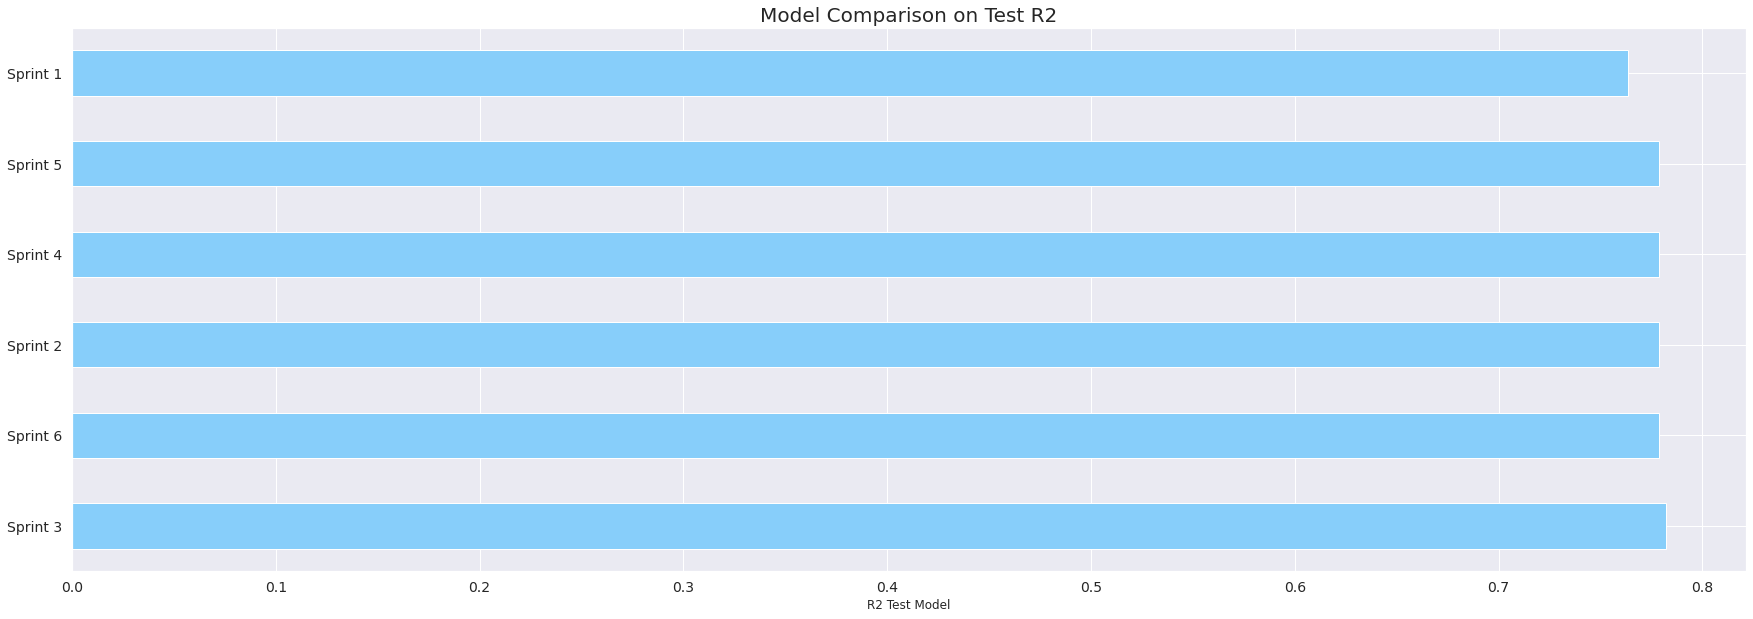

In [ ]:
model_comparison = pd.DataFrame({"model": ["Sprint 1", "Sprint 2","Sprint 3","Sprint 4","Sprint 5","Sprint 6"],
                                 "r2": [r2_score(y_test, pred_test1),r2_score(y_test, pred_test2),r2_score(y_test, pred_test3),r2_score(y_test, pred_test4),r2_score(y_test, pred_test5),r2_score(y_test, pred_test6)]})
model_comparison.sort_values("r2", ascending=False).plot(x="model", y="r2", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("R2 Test Model"); plt.xticks(size=14)
plt.title("Model Comparison on Test R2", size=20);

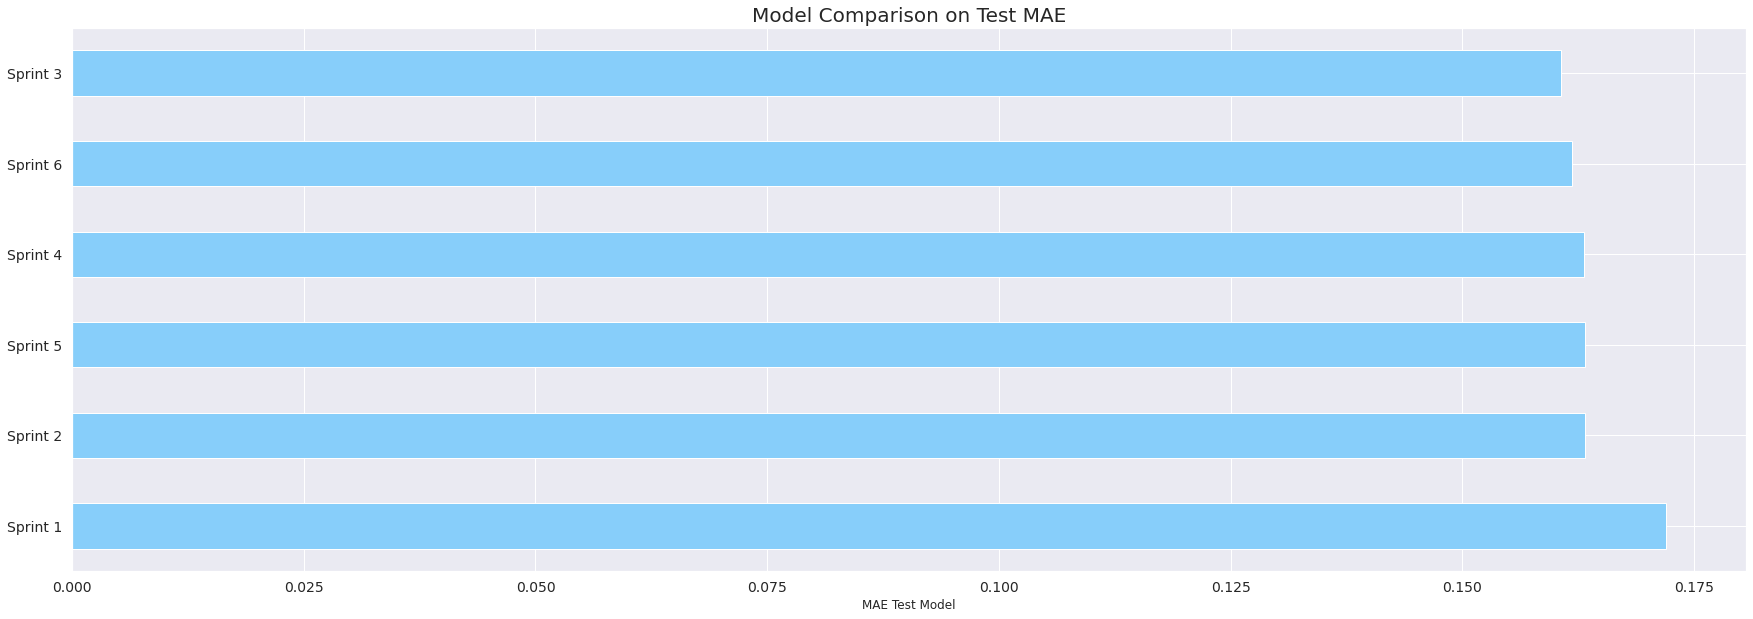

In [ ]:
model_comparison = pd.DataFrame({"model": ["Sprint 1", "Sprint 2","Sprint 3","Sprint 4","Sprint 5","Sprint 6"],
                                 "mae": [mean_absolute_error(y_test, pred_test1),mean_absolute_error(y_test, pred_test2),mean_absolute_error(y_test, pred_test3),mean_absolute_error(y_test, pred_test4),mean_absolute_error(y_test, pred_test5),mean_absolute_error(y_test, pred_test6)]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("MAE Test Model"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

En conclusión, podemos observar que el Sprint 3, el cual utilizó 7 features y una reducción mediante un modelo de regresión lineal presenta un mejor Coeficiente de determinación, y mucho menor Error Absoluto que los demás Sprints, por lo cual, utilizaremos las features del Sprint 3 para nuestro modelo, y las ventas en Estados Unidos como target.

In [ ]:
#Volvemos a resetear las variables X e y, utilizando el modelo de sprint seleccionado
X = df3.drop('NA_Sales',1)
y = df3['NA_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#Normalizamos los datos para que PCA funcione mejor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Analisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.33671871, 0.17213426, 0.1661081 , 0.16276228, 0.11597314,
       0.0463035 ])

In [ ]:
#Nos quedamos con 4 de los componentes obtenidos, los cuales representan el 83,6% de los datos
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

FUNCIÓN PARA OBTENER MAE PROMEDIO:

In [ ]:
def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

In [ ]:
#Obtenemos la performance promedio de nuestro modelo
baseline_guess = np.median(y_train)
basic_baseline_mae = mae(y_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae))

Baseline guess for global sales is: 0.07
Baseline Performance on the test set: MAE = 0.2323


In [ ]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

##EVALUACIÓN DE MODELOS DE ML:

Ya con el dataset con las features principales, compararemos distintos modelos de regresión evaluando aquellos que menos Error Absoluto presenten:

*   Support Vector Machine
*   Random Forest
*   Gradient Boosting
*   K-Neighbors
*   Ridge
*   AdaBoost
*   XGBoost
*   LightBoost


In [ ]:
#Librerías
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost as xgb
import lightgbm as lgb

Support Vector Machine Model

In [ ]:
svm = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(svm_mae))

Support Vector Machine Regression Performance on the test set: MAE = 0.1587


Random Forest Model

In [ ]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(random_forest_mae))

Random Forest Regression Performance on the test set: MAE = 0.1207


Gradient Boosting Model

In [ ]:
gradient_boosting = GradientBoostingRegressor(random_state=60)
gradient_boosting_mae = fit_and_evaluate(gradient_boosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(gradient_boosting_mae))

Gradient Boosting Regression Performance on the test set: MAE = 0.1342


K-Neighbors Model

In [ ]:
knn = KNeighborsRegressor(n_neighbors=8)
knn_mae = fit_and_evaluate(knn)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.1300


Ridge Model

In [ ]:
ridge = Ridge(alpha=10)
ridge_mae = fit_and_evaluate(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

Ridge Regression Performance on the test set: MAE = 0.1818


AdaBoost Model

In [ ]:
adaBoost = AdaBoostRegressor(random_state=60)
adaBoost_mae = fit_and_evaluate(adaBoost)

print("Ada Boost Reggressor Performance on the test set: MAE = {:.04f}".format(adaBoost_mae))

Ada Boost Reggressor Performance on the test set: MAE = 0.3972


XGBoost Model

In [ ]:
xgBoost = xgb.XGBRegressor(random_state=60)
xgBoost_mae = fit_and_evaluate(xgBoost)

print("XGBoost Reggressor Performance on the test set: MAE = {:.04f}".format(xgBoost_mae))

[01:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Reggressor Performance on the test set: MAE = 0.1353


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LightBoost Model

In [ ]:
lightBoost = lgb.LGBMRegressor(random_state=60)
lightBoost_mae = fit_and_evaluate(lightBoost)

print("LightGBM Reggressor Performance on the test set: MAE = {:.04f}".format(lightBoost_mae))

LightGBM Reggressor Performance on the test set: MAE = 0.1256


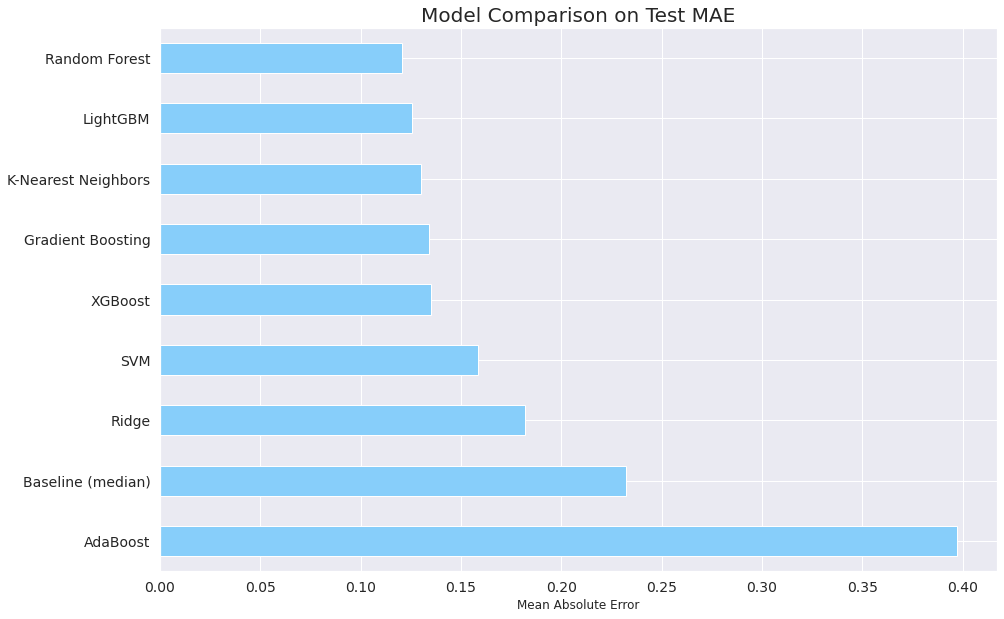

In [ ]:
model_comparison = pd.DataFrame({"model": ["SVM", "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Baseline (median)", "Ridge", "AdaBoost", "XGBoost", "LightGBM"],
                                 "mae": [svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, basic_baseline_mae, ridge_mae, adaBoost_mae, xgBoost_mae, lightBoost_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False,figsize=(15,10))
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

Existe una gran similitud entre los modelos Random Forest, LightBoost, K-Neighbors, Gradient Boosting y XGBoost, y luego lo siguen SVM con un aumento del error absoluto.

Por lo tanto, dedicimos elegir Random Forest, K-Neighbors, Gradient Boosting, XGBoost y SVM para nuestro modelo, los cuales optimizaremos con hiperparámetros y luego evaluaremos cuál es que posee mejor performance.

##MEJORA DE MODELOS DE ML - CLUSTERING:

Se realizará la búsqueda del número de clústers óptimo para nuestro modelo:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
# diccionarios vacios para ser almacenados los resultados
sse,db,slc,cal = {}, {}, {}, {}
for k in range(2, 10):
    # semilla de 10 para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X) # Algoritmo K means
    if k == 8: labels = kmeans.labels_
    clusters = kmeans.labels_ # Extraccion de labels
    sse[k] = kmeans.inertia_ # Inercia: Suma de las distancias de las muestras a su centroide mas cercano
    db[k] = davies_bouldin_score(X,clusters) # Calculo del indice de Davies Bouldin
    slc[k] = silhouette_score(X,clusters) # Calculo del indice de Silhouette
    cal[k] = calinski_harabasz_score(X,clusters)  # Calculo del indice de Calinski-Harabasz

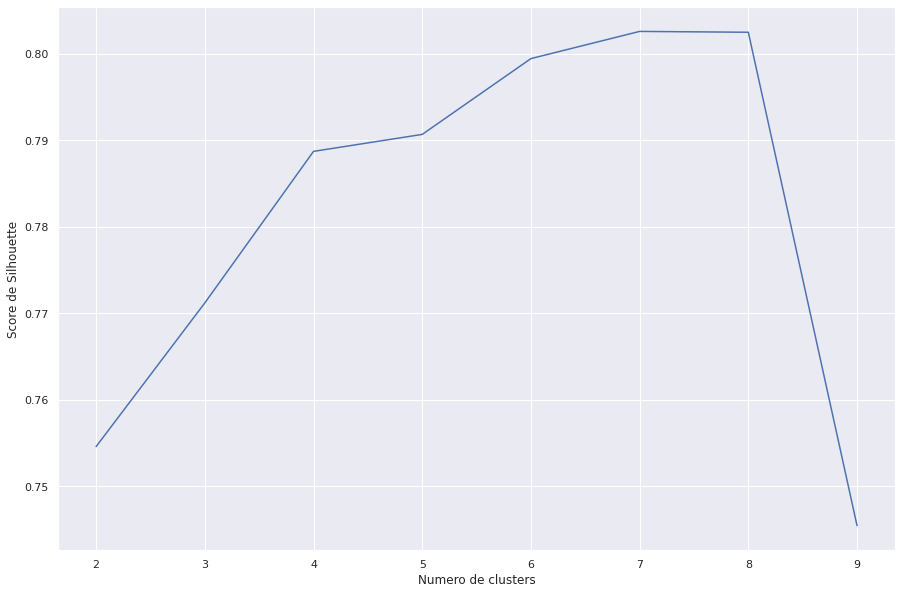

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Score de Silhouette")
plt.show()

Podemos observar mediante el método de Silhouette que a partir de los 7 clústers la curva queda constante y luego desciende, lo cual indica que el número ideal de clústers es de 7. 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Para n_clusters = 3 El promedio del score de silhouette es:  0.7711960984220342
Para n_clusters = 4 El promedio del score de silhouette es:  0.7887190076855509
Para n_clusters = 5 El promedio del score de silhouette es:  0.7906814762058797
Para n_clusters = 6 El promedio del score de silhouette es:  0.7994469600935903
Para n_clusters = 7 El promedio del score de silhouette es:  0.8025900589688045
Para n_clusters = 8 El promedio del score de silhouette es:  0.8024924148912691
Para n_clusters = 9 El promedio del score de silhouette es:  0.7454482210630234


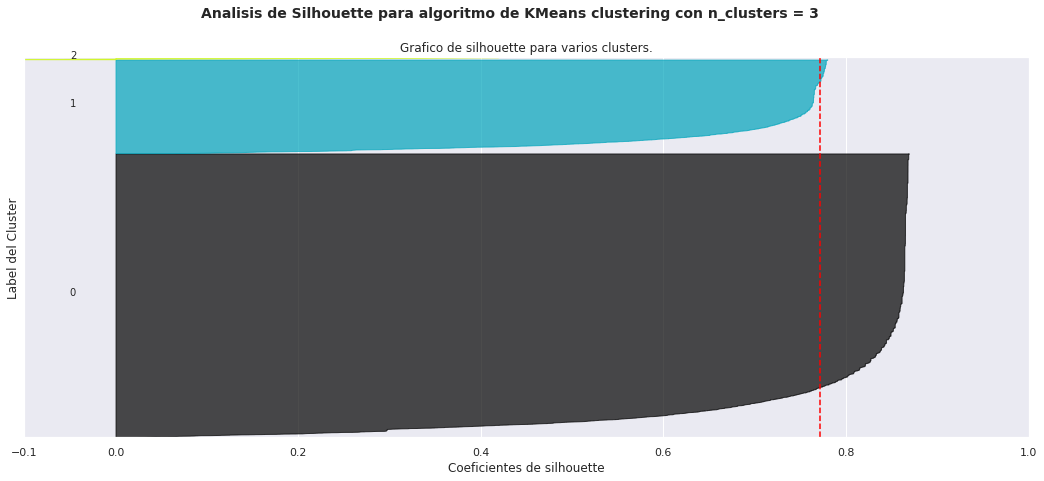

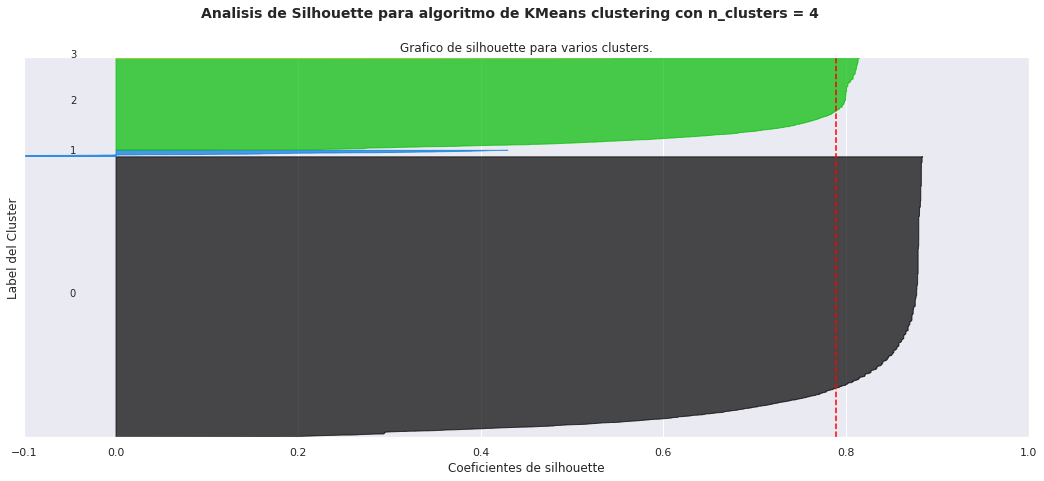

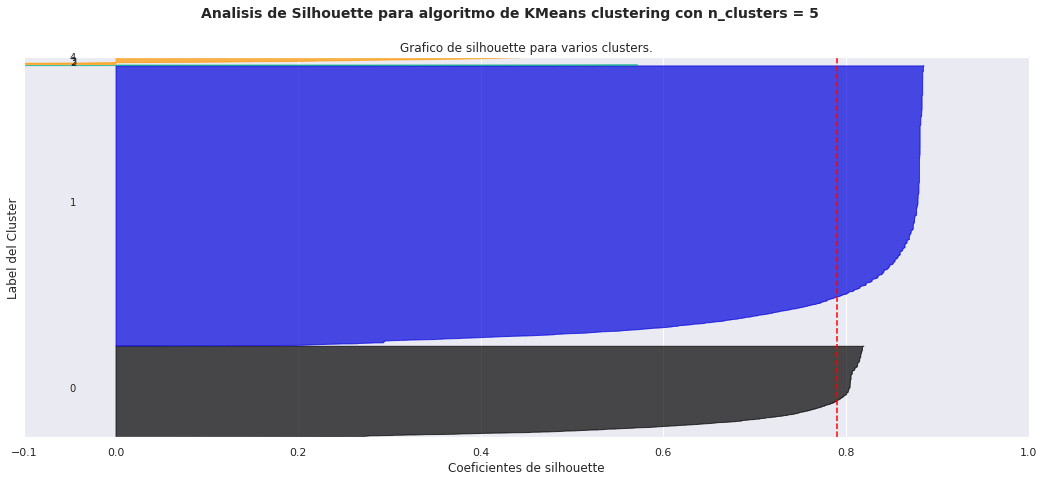

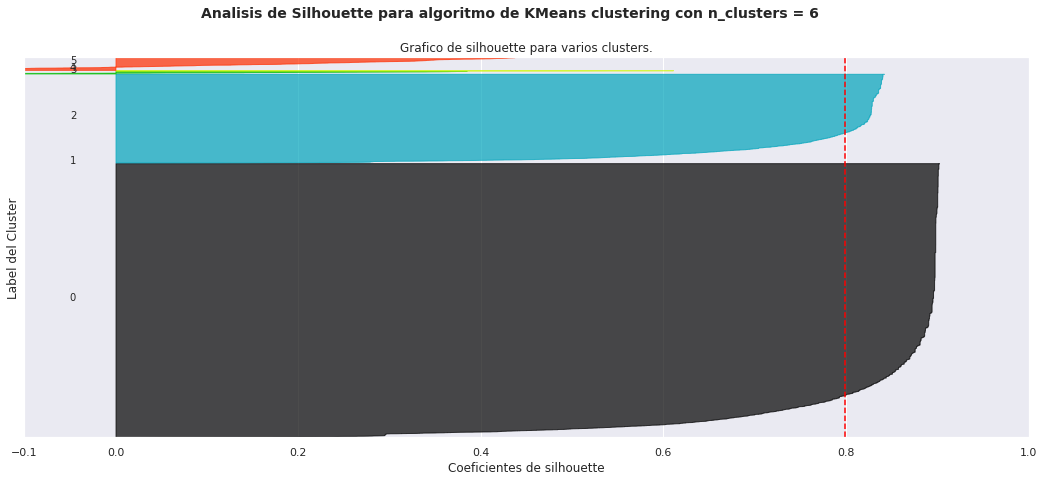

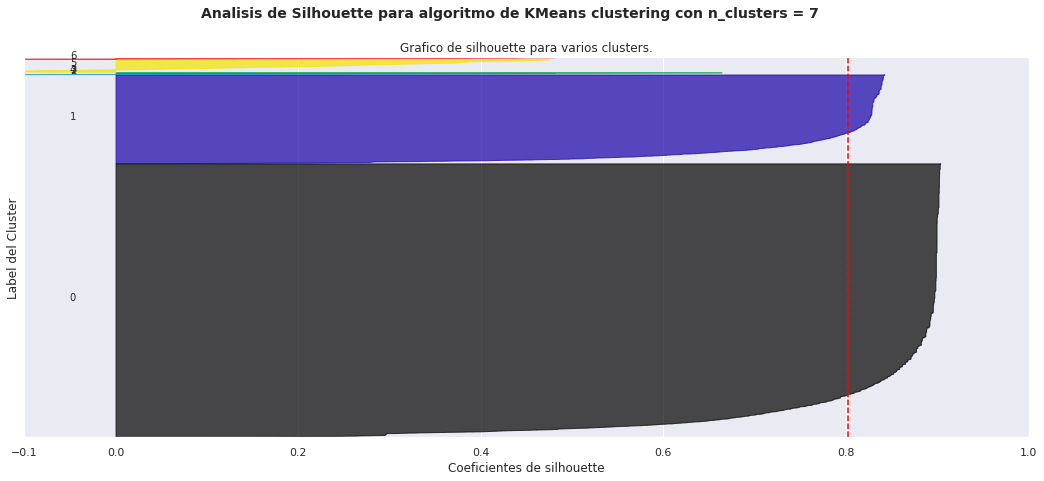

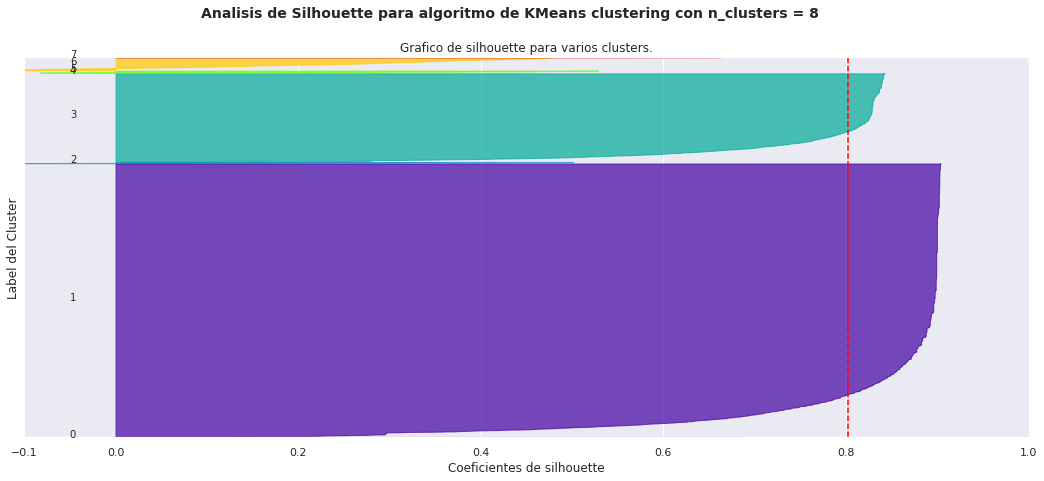

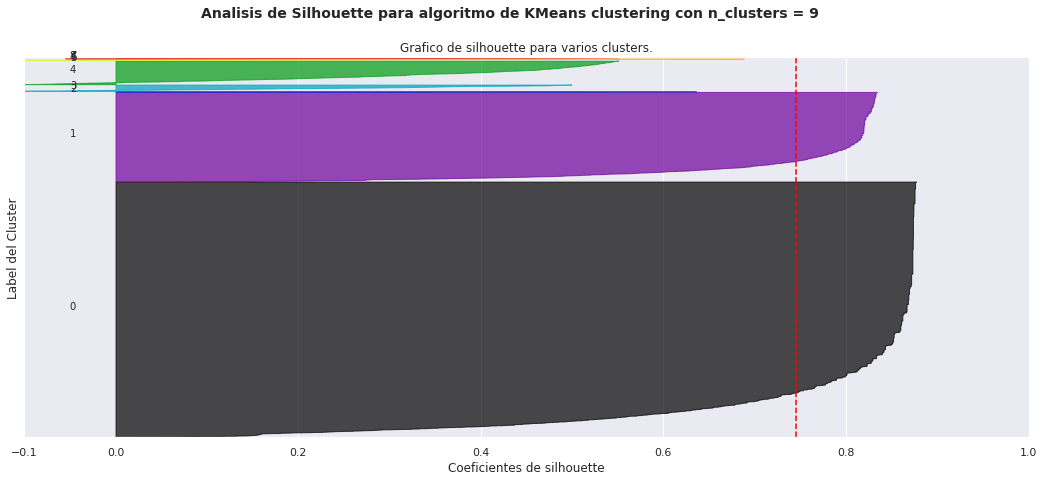

In [ ]:
for n_clusters in range(3, 10):
    # Crear un subplot de 1 fila
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette 
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # El score de silhouette_score da el promedio de todos los valores 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos 
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i 
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10 
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion


    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
#Cantidad óptima de clústers seleccionada
cv = 7

###OPTIMIZACIÓN DE HIPERPARAMETROS PARA LOS MEJORES MODELOS:

Se optimizarán los modelos elegidos anteriormente con hiperparámetros, y a partir de aquel que presente el mejor Coeficiente de Determinación elegiremos el modelo final para la predicción de nuestros datos.

HIPERPARÁMETROS

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, learning_curve
from sklearn.metrics import r2_score

# Loss function to be optimized
loss = ["ls", "lad", "huber"]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [1, 2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ["auto", "sqrt", "log2", None]

hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

XGBoost Model

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=60)

xgb_random_cv = RandomizedSearchCV(estimator=xgb_model,
                               param_distributions=hyperparameter_grid,
                               cv=cv, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=60)

xgb_random_cv.fit(X_train, y_train)

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=trees_grid, cv=cv, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

xgb_grid_search.fit(X_train, y_train)

xgb_final_model = xgb_grid_search.best_estimator_

print("\n XGBoost Model performance on the test set: R2 = {:.04f}".format(r2_score(y_test,xgb_final_model.predict(X_test))))

Fitting 7 folds for each of 20 candidates, totalling 140 fits
[01:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 7 folds for each of 6 candidates, totalling 42 fits
[01:32:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 XGBoost Model performance on the test set: R2 = 0.6365


Random Forest Model

In [ ]:
n_estimators = [50,100,200,300]

hyperparameters = dict(n_estimators=n_estimators)

random_forest_model = RandomForestRegressor(random_state=60)

rf_grid_search = GridSearchCV(estimator=random_forest_model, param_grid=hyperparameters, cv=cv, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

rf_grid_search.fit(X_train, y_train)

rf_final_model = rf_grid_search.best_estimator_

print("\n Random Forest Model performance on the test set: R2 = {:.04f}".format(r2_score(y_test,rf_final_model.predict(X_test))))

Fitting 7 folds for each of 4 candidates, totalling 28 fits

 Random Forest Model performance on the test set: R2 = 0.6251


Gradient Boosting Model

In [ ]:
gradientboost_model = GradientBoostingRegressor(random_state=60)

gradientboost_random_cv = RandomizedSearchCV(estimator=gradientboost_model,
                               param_distributions=hyperparameter_grid,
                               cv=cv, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=60)

gradientboost_random_cv.fit(X_train, y_train)

gradientboost_grid_search = GridSearchCV(estimator=gradientboost_model, param_grid=trees_grid, cv=cv, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

gradientboost_grid_search.fit(X_train, y_train)

gradientboost_final_model = gradientboost_grid_search.best_estimator_

print("\n Gradient Boosting Model performance on the test set: R2 = {:.04f}".format(r2_score(y_test,gradientboost_final_model.predict(X_test))))

Fitting 7 folds for each of 20 candidates, totalling 140 fits
Fitting 7 folds for each of 6 candidates, totalling 42 fits

 Gradient Boosting Model performance on the test set: R2 = 0.6513


K-Neighbors Regressor Model

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = [1,2,3,5,10,20,30,50]
n_neighbors = [1,2,3,5,10,20,30]
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)


knn_model = KNeighborsRegressor(n_neighbors=8)

knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=hyperparameters, cv=cv, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

knn_grid_search.fit(X_train, y_train)

knn_final_model = knn_grid_search.best_estimator_

print("\n K-Neighbors Model performance on the test set: R2 = {:.04f}".format(r2_score(y_test,knn_final_model.predict(X_test))))

Fitting 7 folds for each of 112 candidates, totalling 784 fits

 K-Neighbors Model performance on the test set: R2 = 0.5826


Support Vector Machine Model

In [ ]:
#List Hyperparameters that we want to tune.
hyperparameters =  {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50]}
  
svm_model = SVR(C = 10, gamma=0.1)


svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=hyperparameters, cv=cv, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

svm_grid_search.fit(X_train, y_train)

svm_final_model = svm_grid_search.best_estimator_

print("\n Support Vector Machine Model performance on the test set: R2 = {:.04f}".format(r2_score(y_test,svm_final_model.predict(X_test))))

Fitting 7 folds for each of 12 candidates, totalling 84 fits

 Support Vector Machine Model performance on the test set: R2 = 0.3066


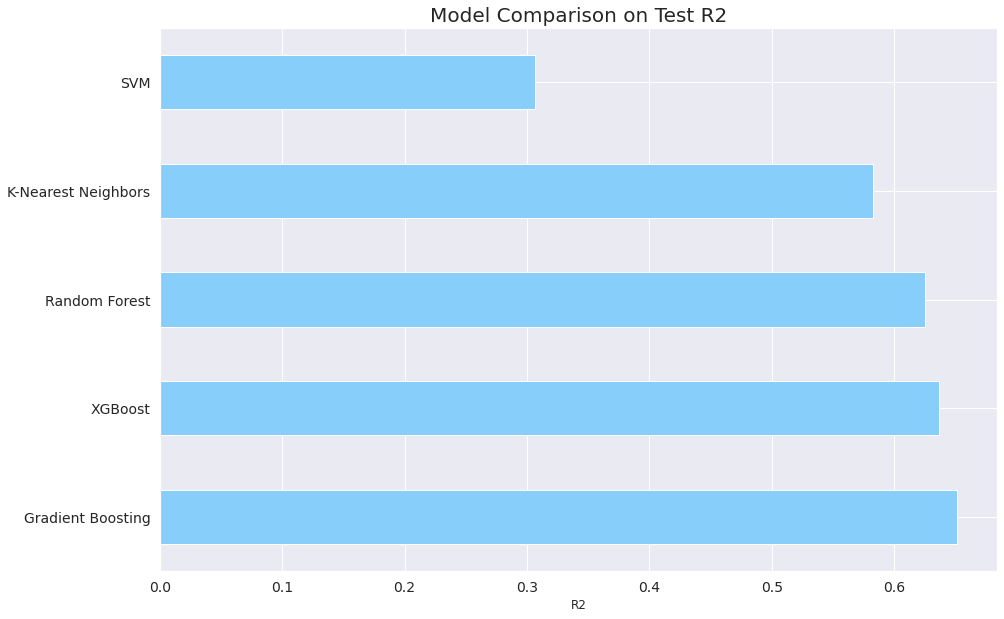

In [ ]:
model_r2_comparison = pd.DataFrame({"model": ["SVM","Gradient Boosting","K-Nearest Neighbors","XGBoost","Random Forest"],
                                    "r2": [r2_score(y_test,svm_final_model.predict(X_test)),r2_score(y_test,gradientboost_final_model.predict(X_test)),
                                           r2_score(y_test,knn_final_model.predict(X_test)),r2_score(y_test,xgb_final_model.predict(X_test)),r2_score(y_test,rf_final_model.predict(X_test))]})
model_r2_comparison.sort_values("r2", ascending=False).plot(x="model", y="r2", kind="barh", color="lightskyblue", legend=False,figsize=(15,10))
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("R2"); plt.xticks(size=14)
plt.title("Model Comparison on Test R2", size=20);

Notamos que tanto Random Forest, XGBoost y GrandientBoosting presentan los mejores Coeficientes de Determinación.

##VERIFICACIÓN DE OVERFITTING:

Observaremos el efecto de Overfitting en el entrenamiento y testeo de nuestros datos, lo cual ayudará a decidir qué modelo de regresión funciona mejor para nuestros datos.

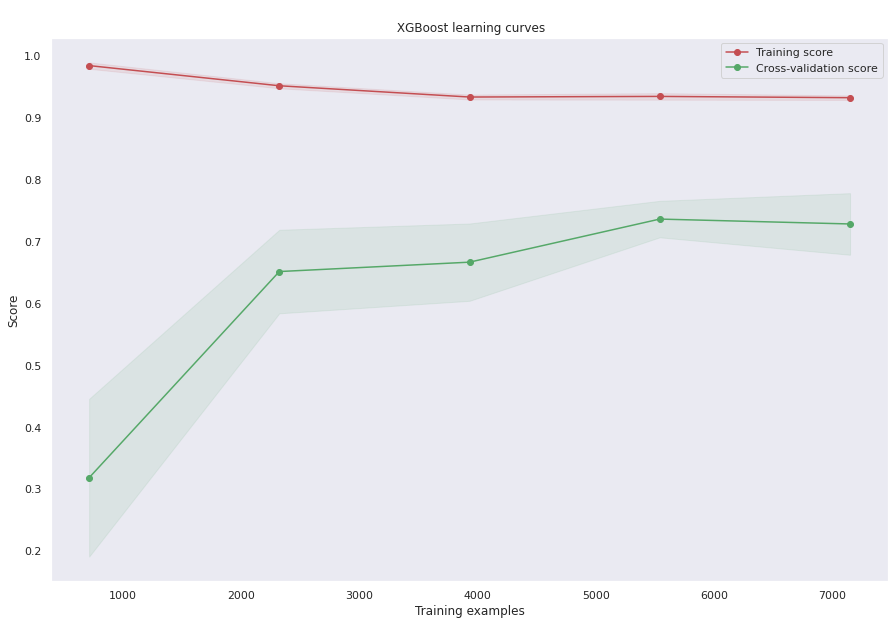

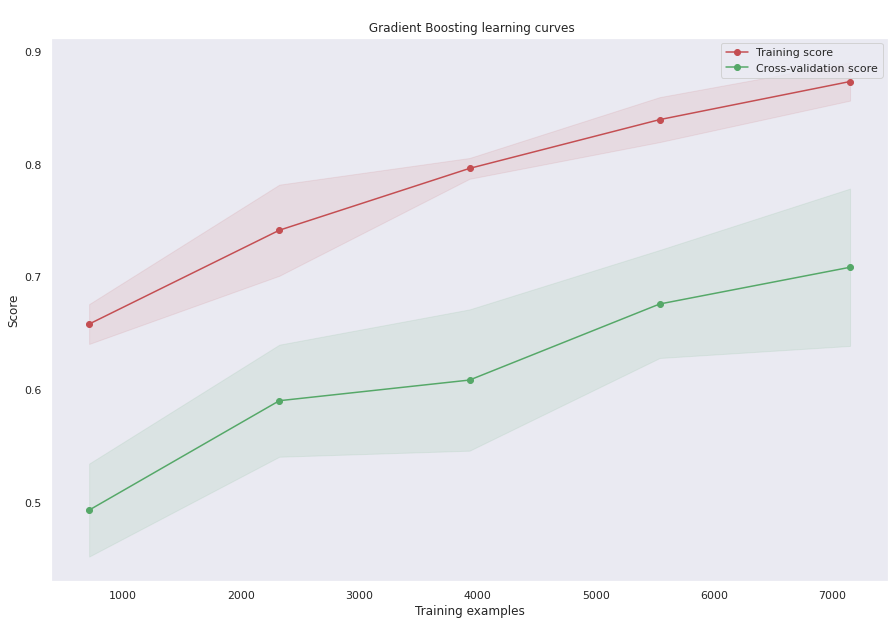

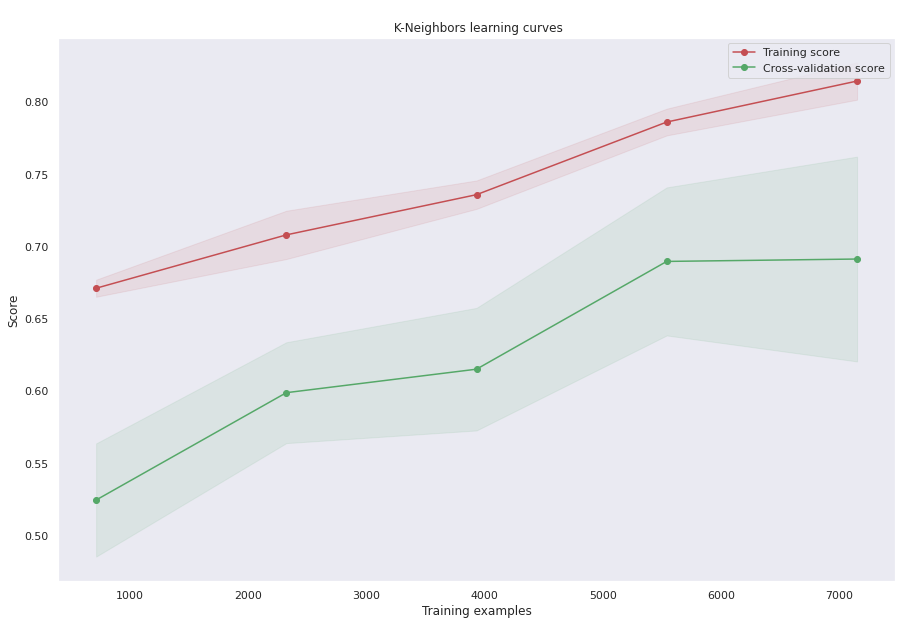

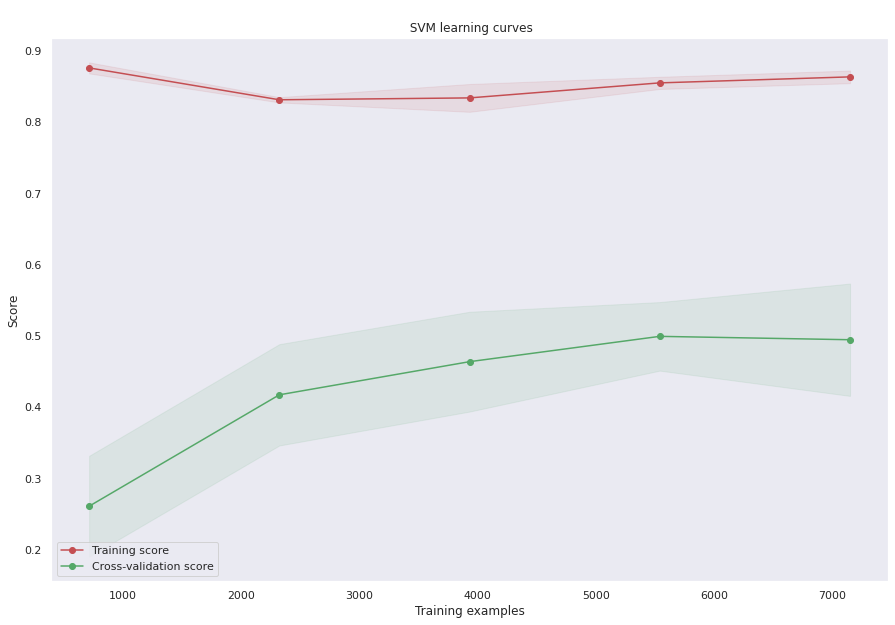

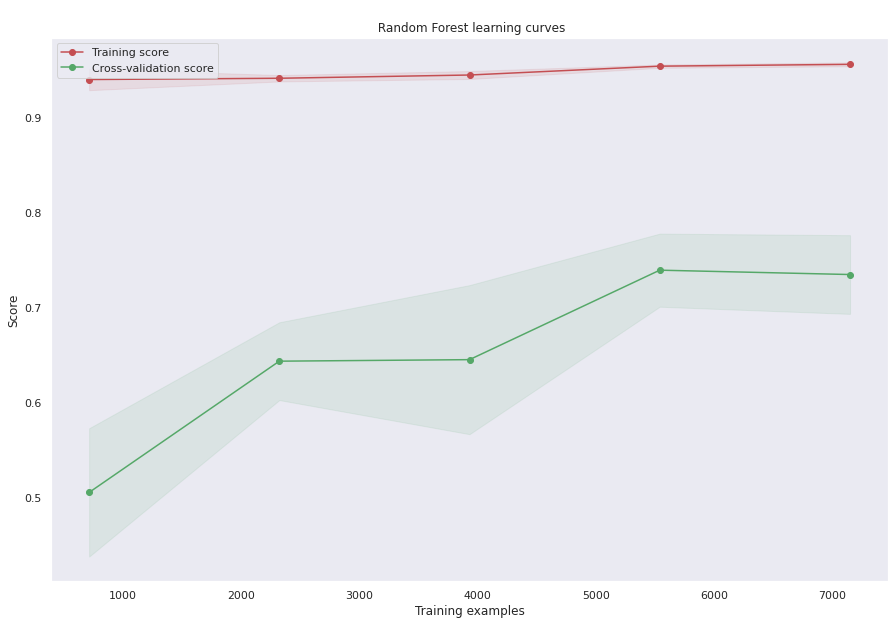

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure(figsize=(15,10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(xgb_random_cv.best_estimator_,"\n XGBoost learning curves",X_train,y_train,cv=cv)
g = plot_learning_curve(gradientboost_random_cv.best_estimator_,"\n Gradient Boosting learning curves",X_train,y_train,cv=cv)
g = plot_learning_curve(knn_grid_search.best_estimator_,"\n K-Neighbors learning curves",X_train,y_train,cv=cv)
g = plot_learning_curve(svm_grid_search.best_estimator_,"\n SVM learning curves",X_train,y_train,cv=cv)
g = plot_learning_curve(rf_grid_search.best_estimator_,"\n Random Forest learning curves",X_train,y_train,cv=cv)

A partir de los gráficos anteriores pudimos corroborar que tanto XGBoost, Random Forest y SVM tienden a sobreajustarse, notando que no logra generalizar los datos y la curva de Training Score no muestra ninguna "sombra".

Por otro lado, los modelos K-Neighbors y GradientBoosting si tienen a generalizar la predicción, por lo tanto serán dichos modelos los que consideraremos elegir para nuestra predicción.

###CORRELACIÓN DE LOS MEJORES MODELOS:

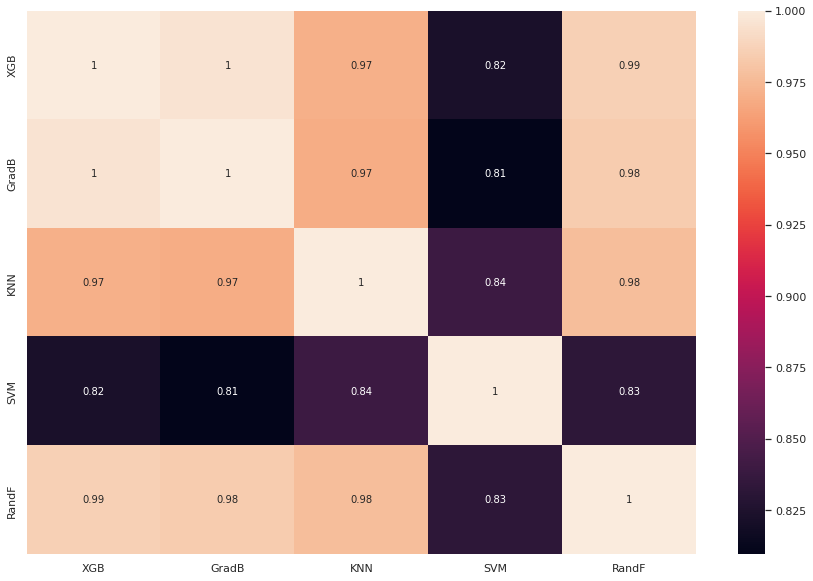

In [ ]:
test_Survived_XGB = pd.Series(xgb_final_model.predict(X_test), name="XGB")
test_Survived_GradB = pd.Series(gradientboost_final_model.predict(X_test), name="GradB")
test_Survived_KNN = pd.Series(knn_final_model.predict(X_test), name="KNN")
test_Survived_SVM = pd.Series(svm_final_model.predict(X_test), name="SVM")
test_Survived_RandF = pd.Series(rf_final_model.predict(X_test), name="RandF")

ensemble_results = pd.concat([test_Survived_XGB,test_Survived_GradB,test_Survived_KNN,test_Survived_SVM,test_Survived_RandF],axis=1)

plt.figure(figsize=(15,10))
g= sns.heatmap(ensemble_results.corr(),annot=True)

Finalmente, vemos que entre los 5 modelos se logra una predicción bastante similar, pero a partir de la información obtenida en nuestro análisis decidimos utilizar Grandient Boosting como modelo de ensamble para la predicción de nuestros datos ya que una vez optmizado presenta un buen Coeficiente de Determinación y bajo error absoluto, rindiendo levemente mejor que K-Neighbors, así como también no presenta una tendencia al sobreajuste de los datos.

##EVALUACION DEL MODELO ELEGIDO: GRADIENT BOOSTING

Evaluaremos el modelo elegido (Gradient Boosting) midiendo su performance a medida que aumentan el número de árboles de decisión:

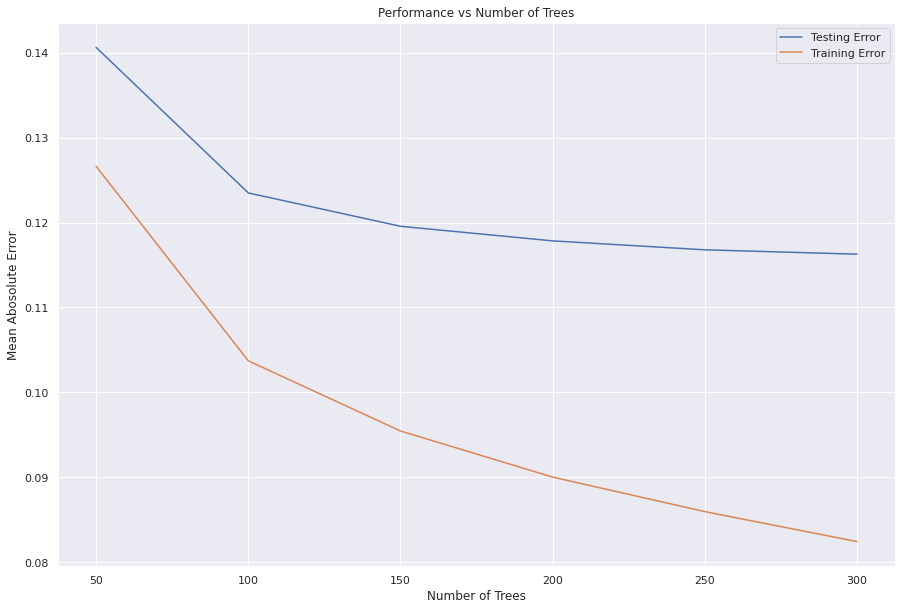

In [ ]:
plt.figure(figsize=(15,10))
results = pd.DataFrame(gradientboost_grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of Trees");

Notamos que a mayor número de árboles disminuye el error absoluto de nuestro modelo tanto en el entrenamiento como en el testeo de los datos.

In [ ]:
basic_final_model = gradientboost_grid_search.best_estimator_
basic_final_model

GradientBoostingRegressor(n_estimators=300, random_state=60)

In [ ]:
basic_final_pred = basic_final_model.predict(X_test)
basic_final_mae = mae(y_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(basic_final_mae))

Final model performance on the test set: MAE = 0.1267.


In [ ]:
#Evaluacion de modelos
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,basic_final_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,basic_final_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,basic_final_pred)))

Mean Absolute Error: 0.12666425832288708
Mean Squared Error: 0.3097007700485227
Root Mean Squared Error: 0.5565076549774699


In [ ]:
from sklearn.metrics import r2_score, accuracy_score
print("Para el modelo de Gradient Boosting optimizado existe un R2 de",r2_score(y_test,basic_final_pred))

Para el modelo de Gradient Boosting optimizado existe un R2 de 0.651321509801337


En conslusión, elegimos el modelo de ensamble Gradient Boosting para predecir nuestros datos de ventas de video juegos para cada región, y considerando las principales features que determinan dichas ventas, según lo detectado en el Sprint 3 al realizar la reducción de dimensionalidad:
- Ventas en cada zona: Estados Unidos, Europa, Japón y Resto del Mundo
- Desarrolladores: Ignition Entertaiment y Paradox Interactive
- Consola: Playstation
- Género: Si consideramos las principales ventas de los desarrolladores mencionados, deberíamos eforcarnos en juegos de Estrategia y Acción.

En función de las características mencionadas nuestro modelo logra un Coeficiente de Determinación que permite explicar el 64% de los datos, y apenas tener un Error Absoluto Promedio del 13%.

Dicho modelo ha funcionado muy bien comparado con los demás modelos evaluados, y en algunos caso ha sido superado en R2 o MAE pero considerando que queremos evitar el sobreajuste de los datos, decidimos que XGBoost es el modelo que mejor se adapta y responde a nuestros datos.